# Supporting information

This notebook produces the content in the *Supporting information* of the revised version (submission to PLOS Comp. Biol.) of the [bioRxiv preprint](https://doi.org/10.1101/2023.03.14.532608) by Roth et al. (2023).

In [1]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')
print(os.getcwd())

/beegfs/home/users/n/nicolas-roth/ScanDy


In [2]:
import numpy as np
import pandas as pd
import random
import pickle 
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
from matplotlib.colors import to_rgb
from matplotlib.legend_handler import HandlerTuple
from matplotlib import ticker

from scandy.models.LocationModel import LocationModel
from scandy.models.ObjectModel import ObjectModel
from scandy.models.MixedModel import MixedModel
from scandy.utils.dataclass import Dataset
import scandy.utils.functions as uf

from neurolib.utils.parameterSpace import ParameterSpace
from neurolib.optimize.evolution import Evolution

Load the dataset with the randomly generated train-test split used in the paper.

In [3]:
vidlist = ['field03', 'dance01', 'dance02', 'foutain02', 'garden04', 'garden06', 'garden07', 'garden09', 'park01', 'park06', 'park09', 'road02', 'road04', 'road05', 'robarm01', 'room01', 'room02', 'room03', 'tommy02', 'uscdog01', 'walkway01', 'walkway02', 'walkway03']
random.seed(12345)
trainlist = sorted(random.sample(sorted(vidlist), 10))
testlist = sorted([vidname for vidname in vidlist if vidname not in trainlist])
print("trainlist = ", trainlist, "\ntestlist =", testlist)

datadict = {
    "PATH": "/scratch/nroth/VidCom/VidCom/",
    'FPS' : 30,
    'PX_TO_DVA' : 0.06,
    'FRAMES_ALL_VIDS' : 300,
    'gt_foveation_df' : 'VidCom_GT_fov_df.csv',
    'gt_fovframes_nss_df' : 'gt_fovframes_nss_df.csv',
    'used_videos' : vidlist,
    'trainset' : trainlist,
    'testset' : testlist,
    "outputpath" : os.getcwd()+"/visualizations/"  # path for saving the visualizations
}
VidCom = Dataset(datadict)
VidCom.gt_foveation_df.loc[VidCom.gt_foveation_df['object'].isna(), 'object'] = 'Ground'

trainlist =  ['dance01', 'dance02', 'garden06', 'garden07', 'park01', 'park06', 'road02', 'road05', 'room01', 'walkway03'] 
testlist = ['field03', 'foutain02', 'garden04', 'garden09', 'park09', 'road04', 'robarm01', 'room02', 'room03', 'tommy02', 'uscdog01', 'walkway01', 'walkway02']


In [4]:
names = ['S.ll', 'S.hl', 'O.ll', 'O.cb', 'M.ll']
gtname = 'Human data'
run_ids = [
    "loc_train_molin_64-32-50_2023-08-01-10H-46M-11S_22770898",
    "loc_train_TASEDnet_64-32-50_2023-08-01-10H-46M-30S_22770899",
    "obj_train_molin_64-32-50_2023-08-01-10H-44M-52S_22770892",
    "obj_train_None_64-32-50_2023-08-01-10H-43M-40S_22770884",
    "mix_train_molin_64-32-50_2023-08-01-10H-45M-24S_22770894",
]
dirnames = ['Background', 'Detection', 'Inspection', 'Revisit']

# color pallettes
dircl = ['xkcd:maroon', sns.color_palette("Dark2")[1], sns.color_palette("Dark2")[5], sns.color_palette("Dark2")[6] ]
mcl = ['xkcd:emerald', 'xkcd:blue', 'xkcd:cyan', 'xkcd:red', 'xkcd:pink', 'xkcd:purple']

## S1 Tab: Table of the used videos

In [8]:
videos = sorted(VidCom.gt_foveation_df.video.unique())

# go through all videos and print a list that says for each if it is in the training or test set 
print(f"Name\t \t#Subjects\t \tTrain/test set")
for video in videos:
    nsubj = len(VidCom.gt_foveation_df[VidCom.gt_foveation_df.video==video].subject.unique())
    if video in VidCom.trainset:
        print(f"{video}\t \t{nsubj}\t \ttrain")
    else:
        print(f"{video}\t \t{nsubj}\t \ttest")


Name	 	#Subjects	 	Train/test set
dance01	 	12	 	train
dance02	 	14	 	train
field03	 	12	 	test
foutain02	 	14	 	test
garden04	 	12	 	test
garden06	 	14	 	train
garden07	 	13	 	train
garden09	 	12	 	test
park01	 	12	 	train
park06	 	12	 	train
park09	 	11	 	test
road02	 	11	 	train
road04	 	11	 	test
road05	 	11	 	train
robarm01	 	12	 	test
room01	 	10	 	train
room02	 	12	 	test
room03	 	10	 	test
tommy02	 	13	 	test
uscdog01	 	12	 	test
walkway01	 	13	 	test
walkway02	 	13	 	test
walkway03	 	13	 	train


## S1 & S2 Figs: Parameter exploration and robustness

We show the results of the parameter exploration and robustness analysis for the two models.

### S1 Fig: The space-based model with low-level features:

MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `./data/hdf/evolution.hdf`.
MainProcess pypet.environment.Environment INFO     Environment initialized.
MainProcess root INFO     Evolution: Using algorithm: adaptive
MainProcess root INFO     Evolution: Individual generation: <function randomParametersAdaptive at 0x7f5d6ee5fc20>
MainProcess root INFO     Evolution: Mating operator: <function cxBlend at 0x7f5d731b14d0>
MainProcess root INFO     Evolution: Mutation operator: <function gaussianAdaptiveMutation_nStepSizes at 0x7f5d6ee610e0>
MainProcess root INFO     Evolution: Parent selection: <function selRank at 0x7f5d6ee5fdd0>
MainProcess root INFO     Evolution: Selection operator: <function selBest_multiObj at 0x7f5d6ee5fe60>


{'ddm_thres': 0.3836602478491575, 'ddm_sig': 0.011484195006375502, 'att_dva': 12.609189379285981, 'ior_decay': 257.42199145836975, 'ior_dva': 6.903583545038676}


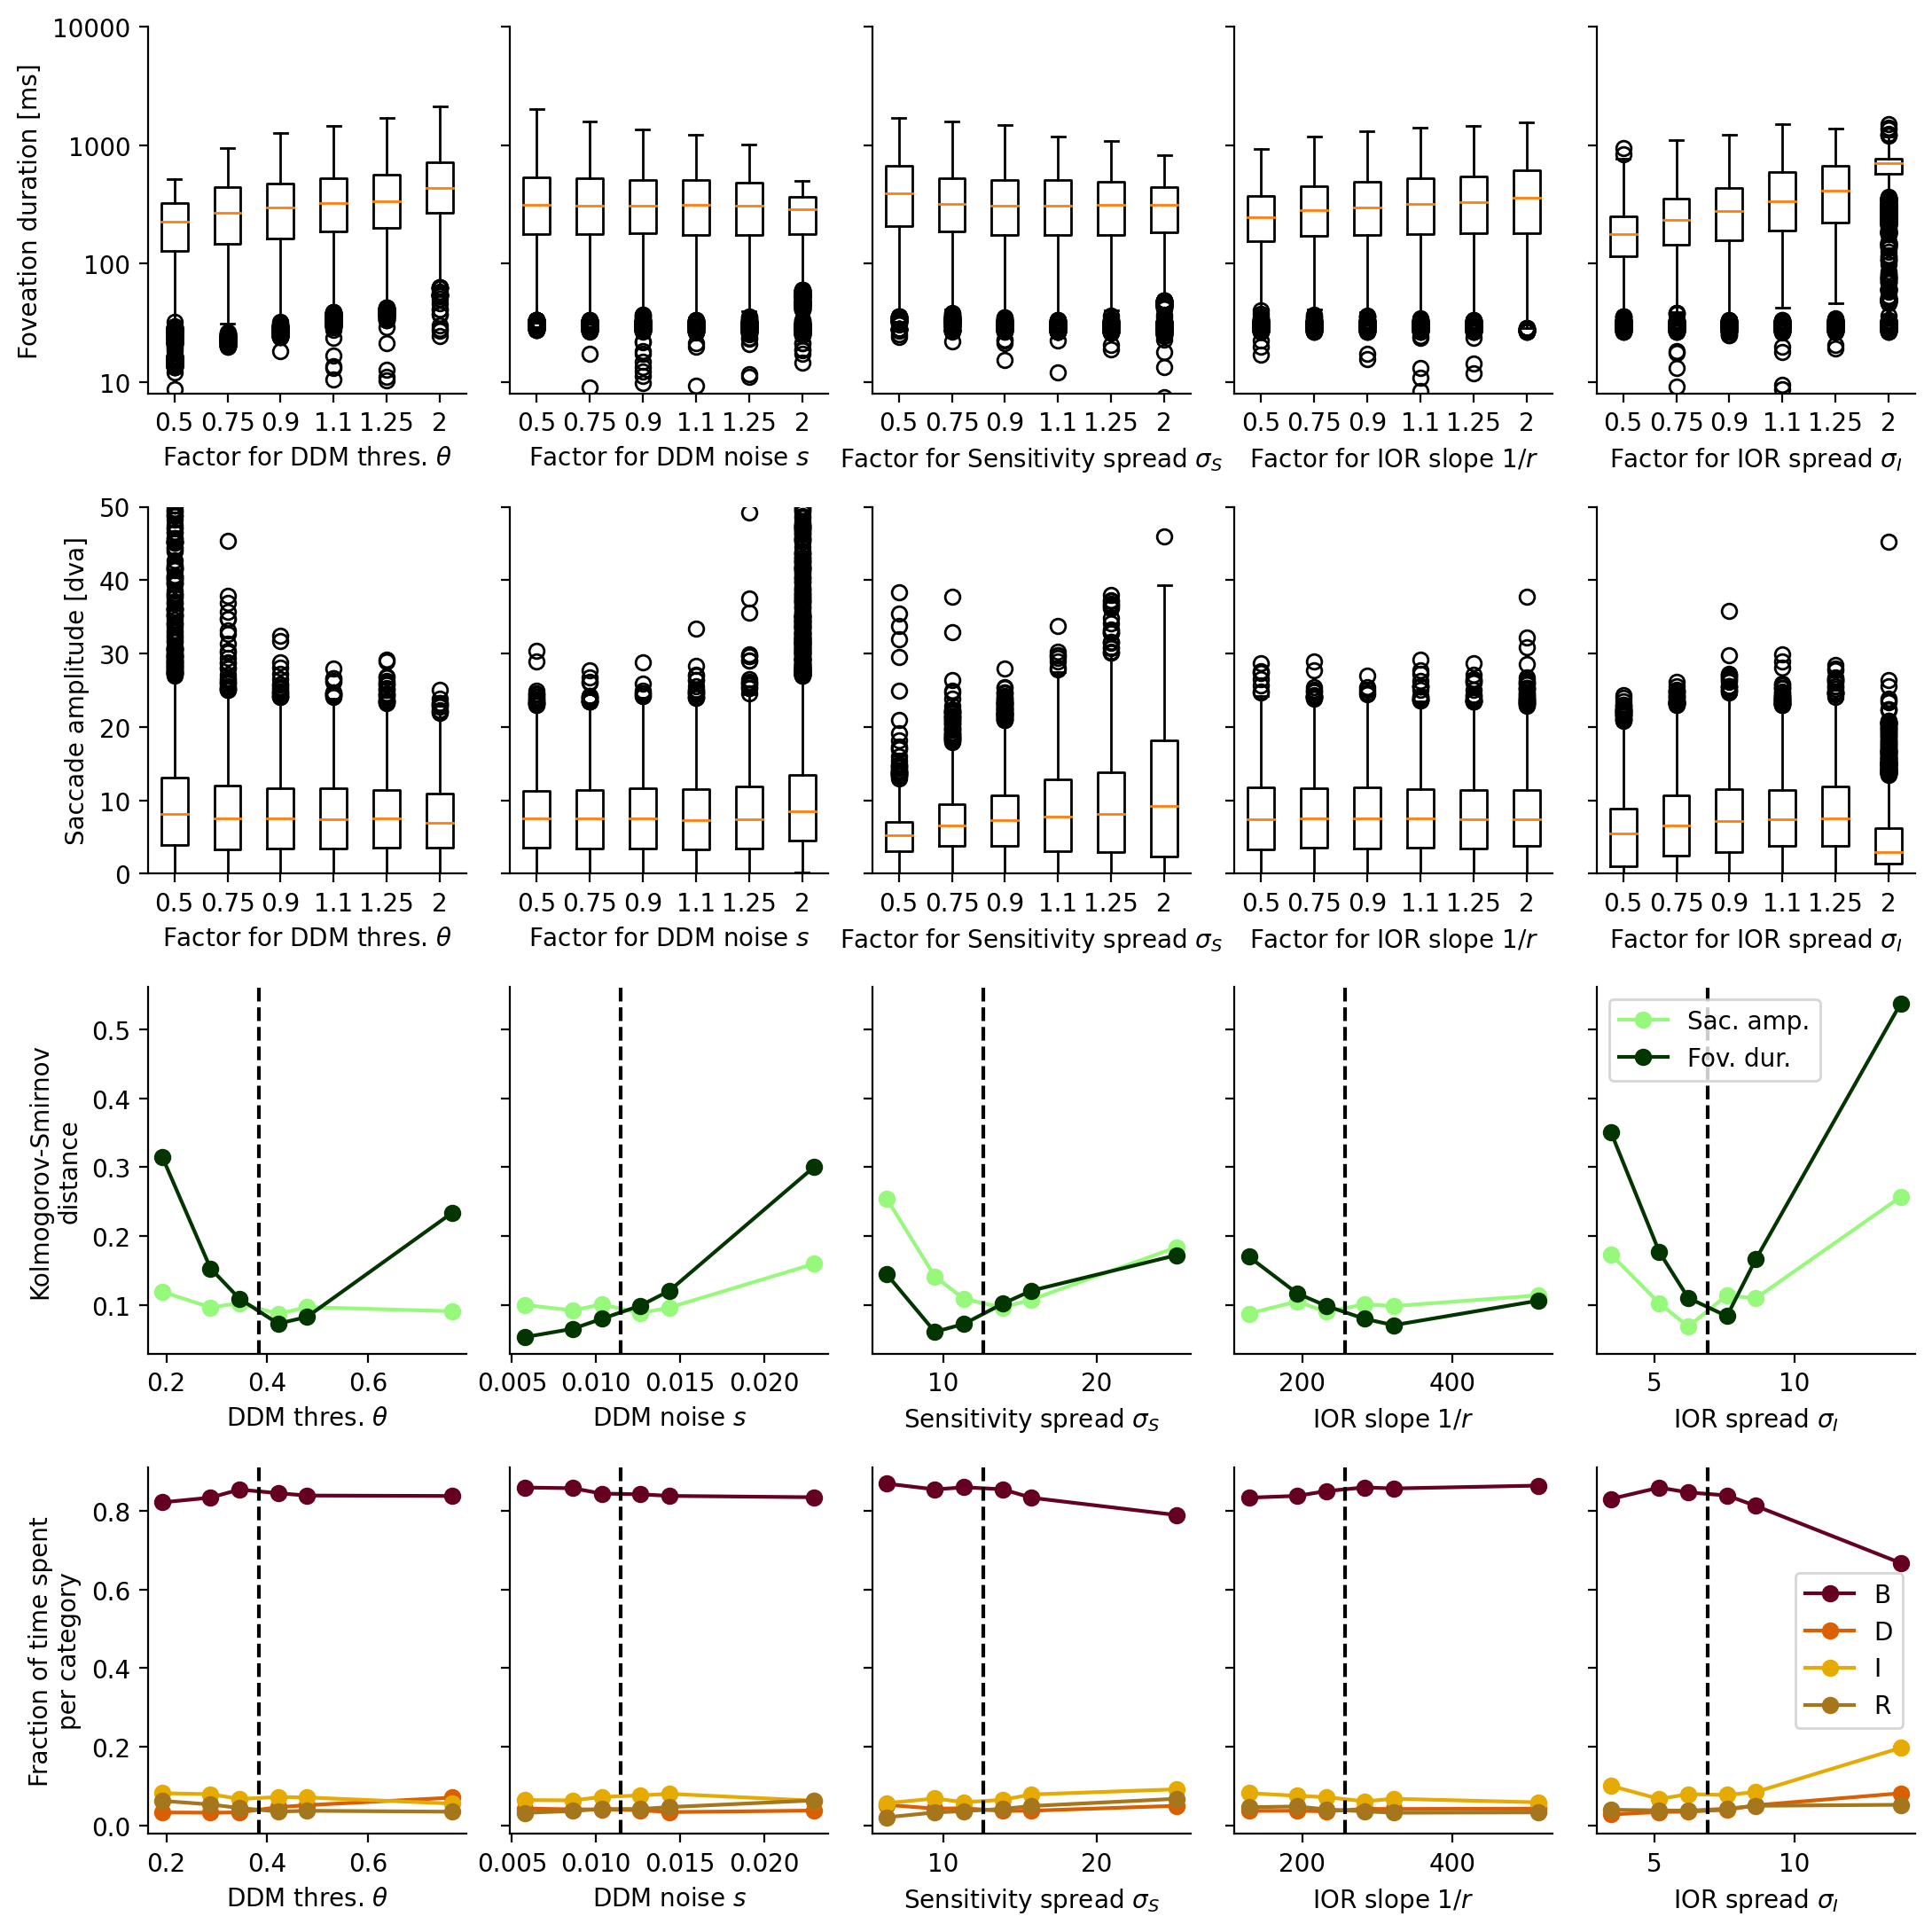

In [5]:
runid = run_ids[0]
model = LocationModel(VidCom)
parameters = ['ddm_thres', 'ddm_sig', 'att_dva', 'ior_decay', 'ior_dva']
par_sym = [r'DDM thres. $\theta$', r'DDM noise $s$', r'Sensitivity spread $\sigma_S$', r'IOR slope $1/r$', r'IOR spread $\sigma_I$']
relative_par_vals = [0.5, 0.75, 0.9, 1.1, 1.25, 2]

uf.plot_var_pars(model, './results/', runid, parameters, par_sym, relative_par_vals, dircl)

### S2 Fig: The object-based model with low-level features:

MainProcess root INFO     weightList not set, assuming single fitness value to be maximized.
MainProcess root INFO     Trajectory Name: results-2023-08-14-18H-21M-43S
MainProcess root INFO     Storing data to: ./data/hdf/evolution.hdf
MainProcess root INFO     Trajectory Name: results-2023-08-14-18H-21M-43S
MainProcess root INFO     Number of cores: 40
MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `./data/hdf/evolution.hdf`.
MainProcess pypet.environment.Environment INFO     Environment initialized.
MainProcess root INFO     Evolution: Using algorithm: adaptive
/home/users/n/nicolas-roth/miniconda3/envs/venv/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/users/n/nicolas-roth/miniconda3/envs/venv/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A 

{'ddm_thres': 2.361344565479803, 'ddm_sig': 0.23727380693944877, 'att_dva': 14.411482125292114, 'ior_decay': 232.3344973881489, 'ior_inobj': 0.6582519115660431}


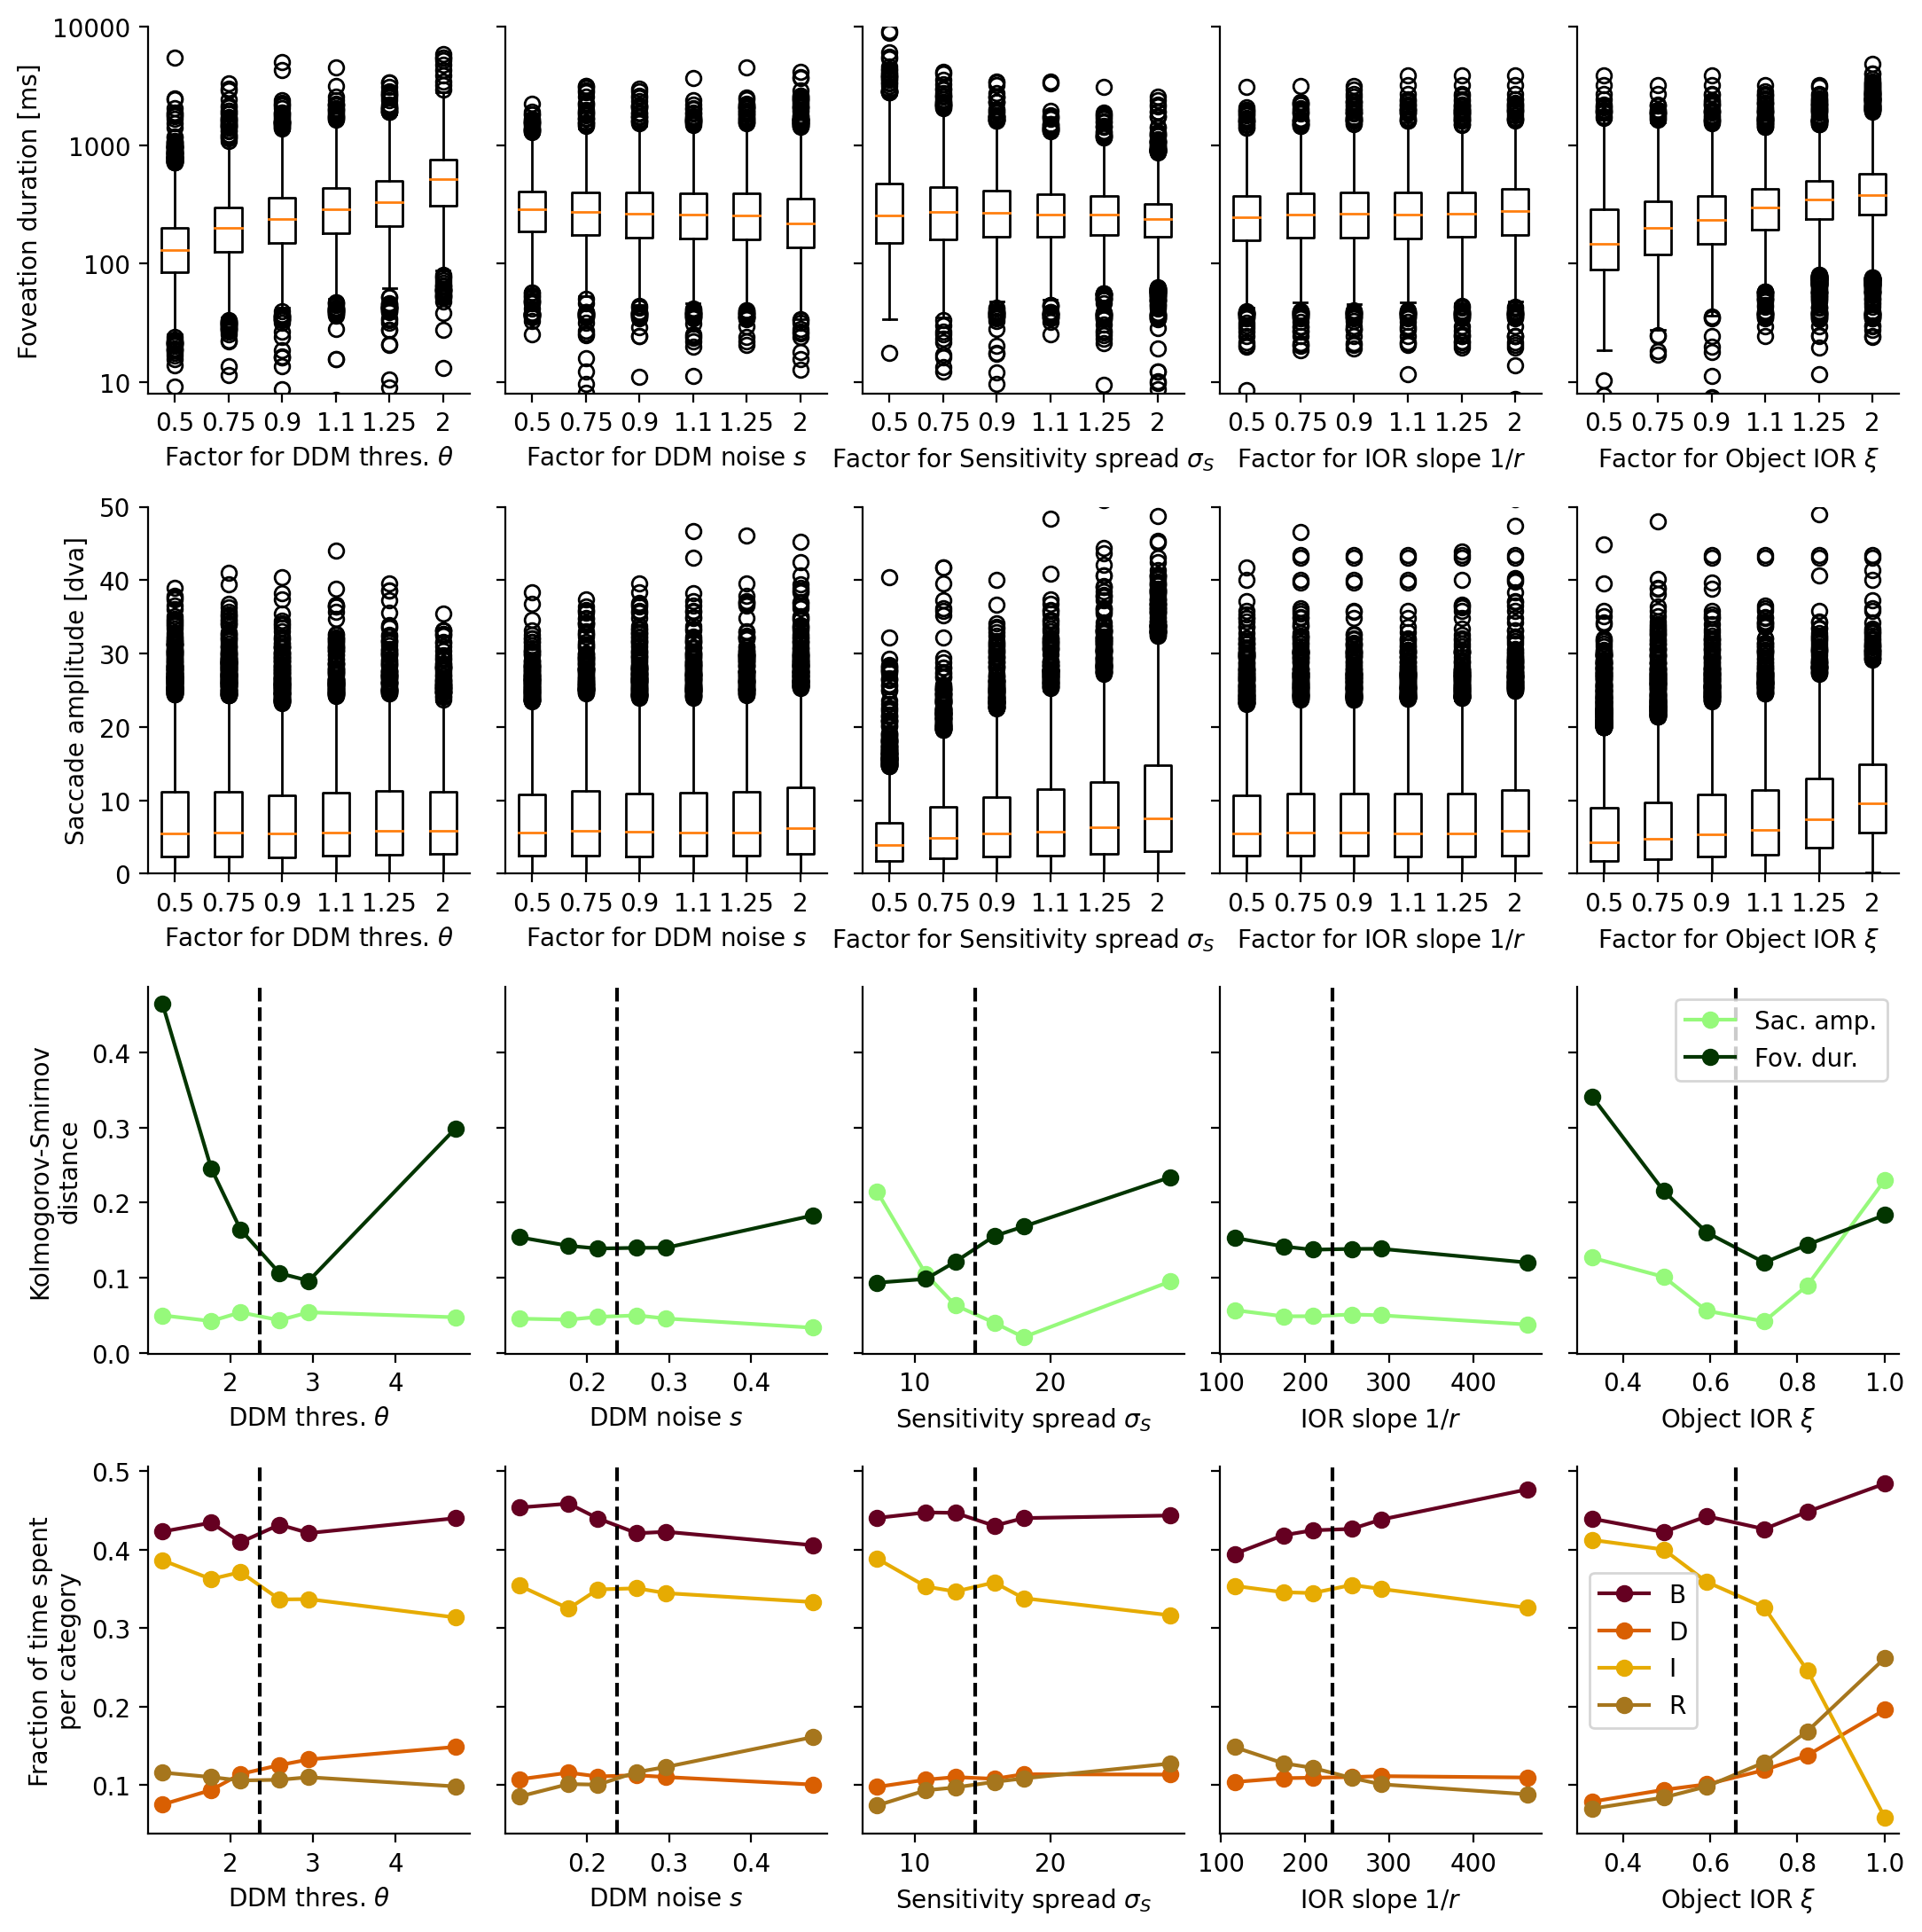

In [6]:
runid = run_ids[2]
model = ObjectModel(VidCom)
parameters = ['ddm_thres', 'ddm_sig', 'att_dva', 'ior_decay', 'ior_inobj']
par_sym = [r'DDM thres. $\theta$', r'DDM noise $s$', r'Sensitivity spread $\sigma_S$', r'IOR slope $1/r$', r'Object IOR $\xi$']
relative_par_vals = [0.5, 0.75, 0.9, 1.1, 1.25, 2]

uf.plot_var_pars(model, "./results/", runid, parameters, par_sym, relative_par_vals, dircl)

## S3-7: Parameter spaces of all models

MainProcess root INFO     weightList not set, assuming single fitness value to be maximized.
MainProcess root INFO     Trajectory Name: results-2023-08-14-18H-22M-19S
MainProcess root INFO     Storing data to: ./data/hdf/evolution.hdf
MainProcess root INFO     Trajectory Name: results-2023-08-14-18H-22M-19S
MainProcess root INFO     Number of cores: 40
MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `./data/hdf/evolution.hdf`.
MainProcess pypet.environment.Environment INFO     Environment initialized.
MainProcess root INFO     Evolution: Using algorithm: adaptive
/home/users/n/nicolas-roth/miniconda3/envs/venv/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/users/n/nicolas-roth/miniconda3/envs/venv/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A 

________________________ 
runid = loc_train_molin_64-32-50_2023-08-01-10H-46M-11S_22770898 
________________________
> Simulation parameters
HDF file storage: ./data/hdf/loc_train_molin_64-32-50_2023-08-01-10H-46M-11S_22770898.hdf
Trajectory Name: results-2023-08-01-10H-46M-11S
Duration of evaluating initial population 0:56:19.168726
Duration of evolution 22:45:03.608003
Eval function: <function optimize_me at 0x7f5d5f1828c0>
Parameter space: {'ddm_thres': [0.2, 2], 'ddm_sig': [0.01, 0.1], 'att_dva': [3, 15], 'ior_decay': [30, 300], 'ior_dva': [0.5, 10]}
> Evolution parameters
Number of generations: 50
Initial population size: 64
Population size: 32
> Evolutionary operators
Mating operator: <function cxBlend at 0x7f5d731b14d0>
Mating paramter: {'alpha': 0.5}
Selection operator: <function selBest_multiObj at 0x7f5d6ee5fe60>
Selection paramter: {}
Parent selection operator: <function selRank at 0x7f5d6ee5fdd0>
Comments: no comments
--- Info summary ---
Valid: 32
Mean score (weighted fitn

/home/users/n/nicolas-roth/miniconda3/envs/venv/lib/python3.7/site-packages/neurolib/optimize/evolution/evolutionaryUtils.py:212: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


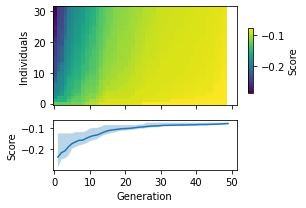

MainProcess root INFO     Saving plot to ./data/figures/results-2023-08-01-10H-46M-11S_hist_49.png


There are 32 valid individuals
Mean score across population: -0.08


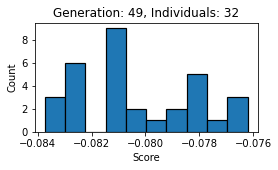

<Figure size 432x288 with 0 Axes>

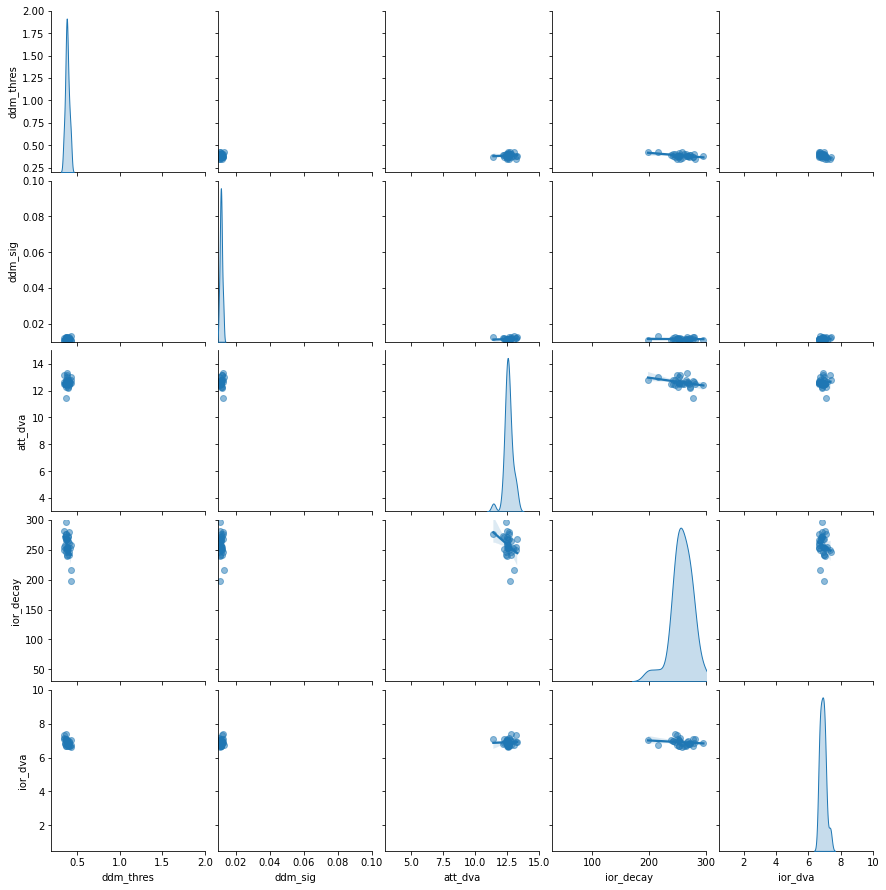

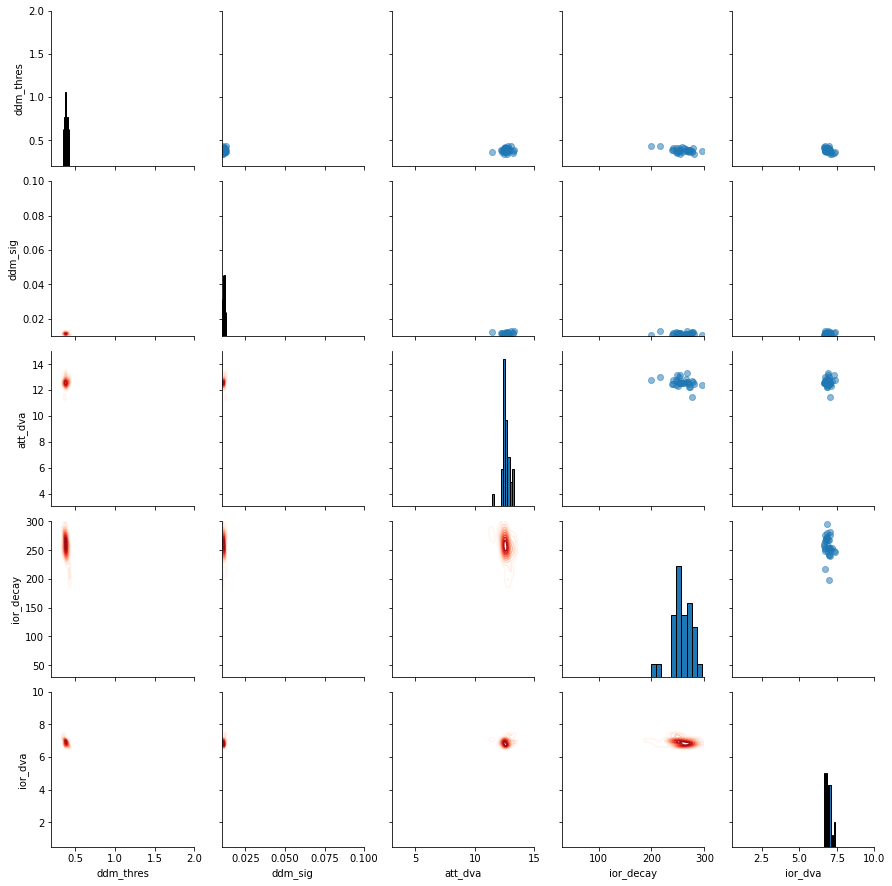

MainProcess root INFO     weightList not set, assuming single fitness value to be maximized.
MainProcess root INFO     Trajectory Name: results-2023-08-14-18H-22M-40S
MainProcess root INFO     Storing data to: ./data/hdf/evolution.hdf
MainProcess root INFO     Trajectory Name: results-2023-08-14-18H-22M-40S
MainProcess root INFO     Number of cores: 40
MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `./data/hdf/evolution.hdf`.
MainProcess pypet.environment.Environment INFO     Environment initialized.
MainProcess root INFO     Evolution: Using algorithm: adaptive
/home/users/n/nicolas-roth/miniconda3/envs/venv/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/users/n/nicolas-roth/miniconda3/envs/venv/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A 

________________________ 
runid = loc_train_TASEDnet_64-32-50_2023-08-01-10H-46M-30S_22770899 
________________________
> Simulation parameters
HDF file storage: ./data/hdf/loc_train_TASEDnet_64-32-50_2023-08-01-10H-46M-30S_22770899.hdf
Trajectory Name: results-2023-08-01-10H-46M-30S
Duration of evaluating initial population 0:56:24.570974
Duration of evolution 23:01:11.058001
Eval function: <function optimize_me at 0x7f5d5eb84200>
Parameter space: {'ddm_thres': [0.2, 2], 'ddm_sig': [0.01, 0.1], 'att_dva': [3, 15], 'ior_decay': [30, 300], 'ior_dva': [0.5, 10]}
> Evolution parameters
Number of generations: 50
Initial population size: 64
Population size: 32
> Evolutionary operators
Mating operator: <function cxBlend at 0x7f5d731b14d0>
Mating paramter: {'alpha': 0.5}
Selection operator: <function selBest_multiObj at 0x7f5d6ee5fe60>
Selection paramter: {}
Parent selection operator: <function selRank at 0x7f5d6ee5fdd0>
Comments: no comments
--- Info summary ---
Valid: 32
Mean score (weighte

/home/users/n/nicolas-roth/miniconda3/envs/venv/lib/python3.7/site-packages/neurolib/optimize/evolution/evolutionaryUtils.py:212: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


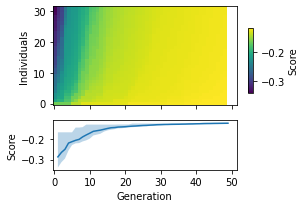

MainProcess root INFO     Saving plot to ./data/figures/results-2023-08-01-10H-46M-30S_hist_49.png


There are 32 valid individuals
Mean score across population: -0.12


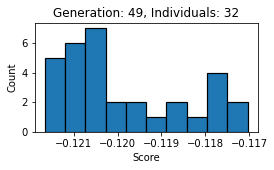

<Figure size 432x288 with 0 Axes>

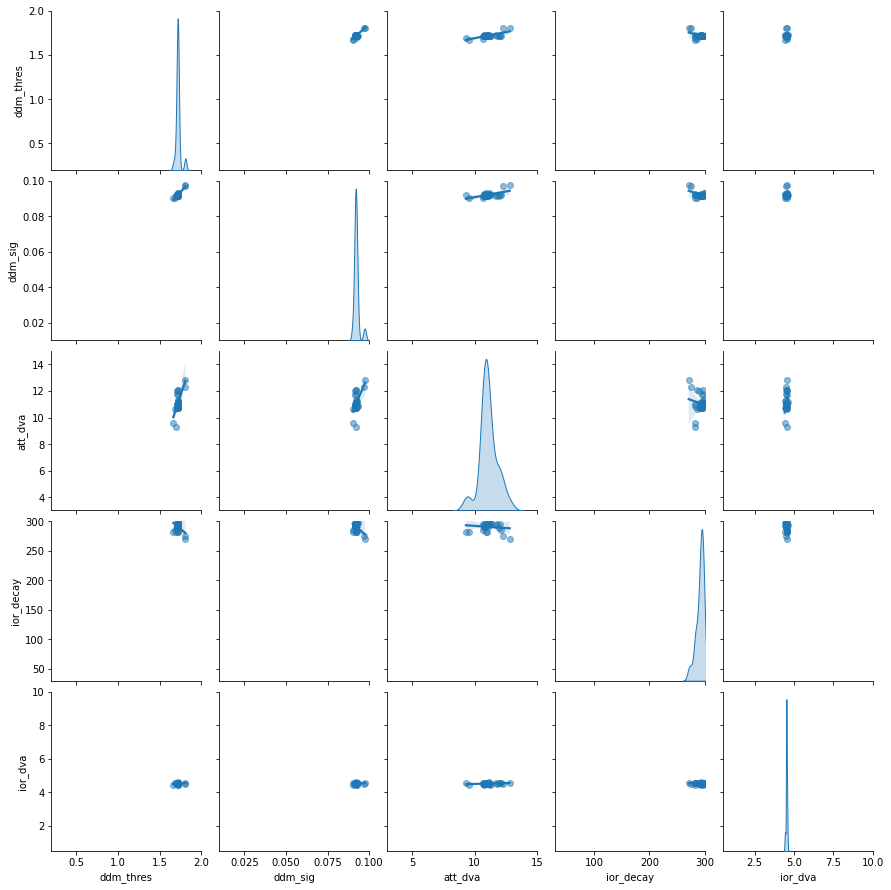

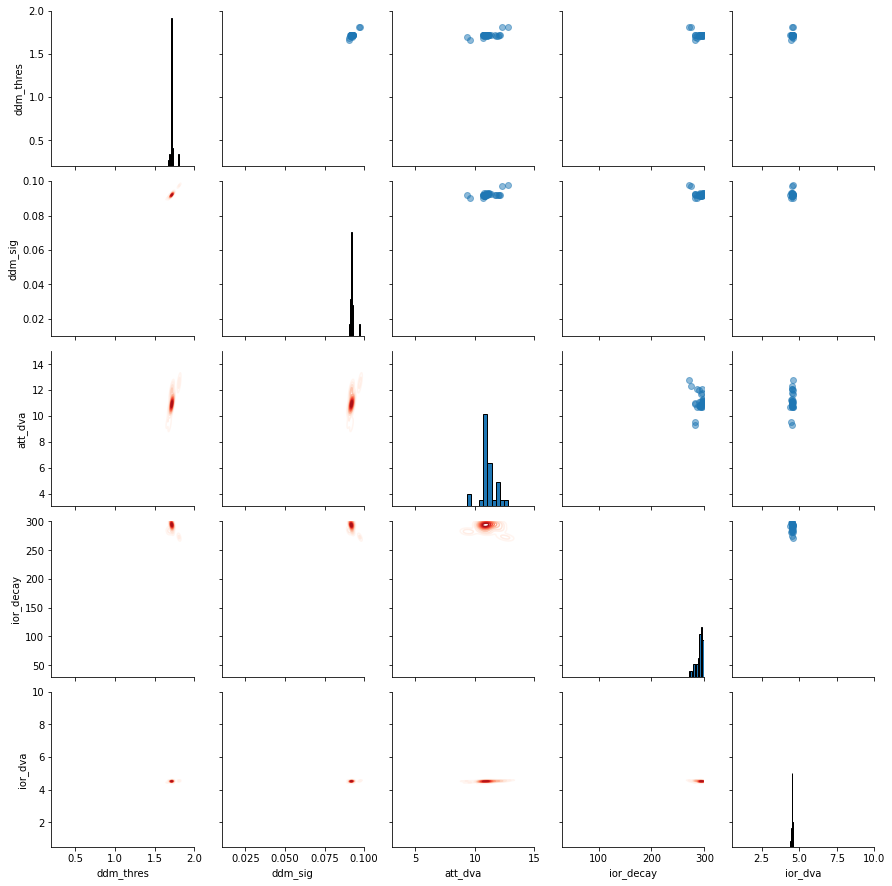

MainProcess root INFO     weightList not set, assuming single fitness value to be maximized.
MainProcess root INFO     Trajectory Name: results-2023-08-14-18H-23M-01S
MainProcess root INFO     Storing data to: ./data/hdf/evolution.hdf
MainProcess root INFO     Trajectory Name: results-2023-08-14-18H-23M-01S
MainProcess root INFO     Number of cores: 40
MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `./data/hdf/evolution.hdf`.
MainProcess pypet.environment.Environment INFO     Environment initialized.
MainProcess root INFO     Evolution: Using algorithm: adaptive
/home/users/n/nicolas-roth/miniconda3/envs/venv/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/users/n/nicolas-roth/miniconda3/envs/venv/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A 

________________________ 
runid = obj_train_molin_64-32-50_2023-08-01-10H-44M-52S_22770892 
________________________
> Simulation parameters
HDF file storage: ./data/hdf/obj_train_molin_64-32-50_2023-08-01-10H-44M-52S_22770892.hdf
Trajectory Name: results-2023-08-01-10H-44M-52S
Duration of evaluating initial population 0:39:29.667512
Duration of evolution 16:18:14.825646
Eval function: <function optimize_me at 0x7f5d58c8b290>
Parameter space: {'ddm_thres': [1.0, 3.0], 'ddm_sig': [0.05, 0.25], 'att_dva': [5, 20], 'ior_decay': [30, 300], 'ior_inobj': [0.4, 1.0]}
> Evolution parameters
Number of generations: 50
Initial population size: 64
Population size: 32
> Evolutionary operators
Mating operator: <function cxBlend at 0x7f5d731b14d0>
Mating paramter: {'alpha': 0.5}
Selection operator: <function selBest_multiObj at 0x7f5d6ee5fe60>
Selection paramter: {}
Parent selection operator: <function selRank at 0x7f5d6ee5fdd0>
Comments: no comments
--- Info summary ---
Valid: 32
Mean score (weighte

/home/users/n/nicolas-roth/miniconda3/envs/venv/lib/python3.7/site-packages/neurolib/optimize/evolution/evolutionaryUtils.py:212: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


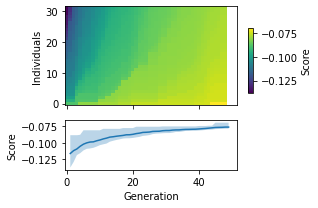

MainProcess root INFO     Saving plot to ./data/figures/results-2023-08-01-10H-44M-52S_hist_49.png


There are 32 valid individuals
Mean score across population: -0.076


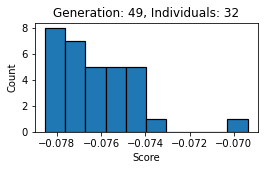

<Figure size 432x288 with 0 Axes>

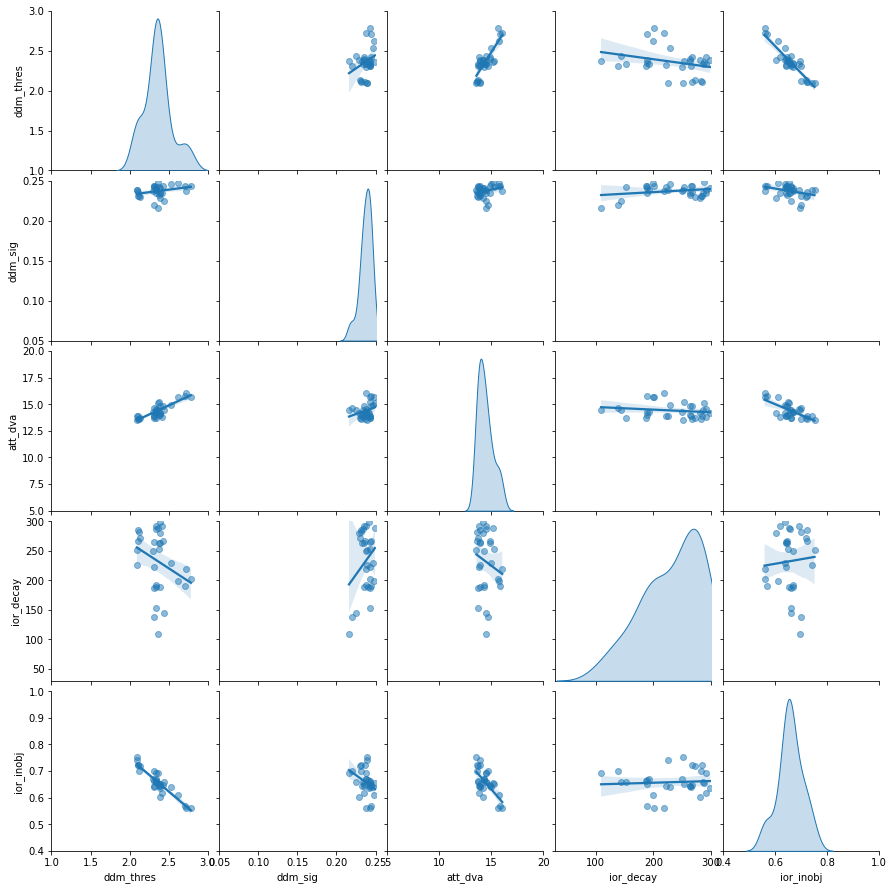

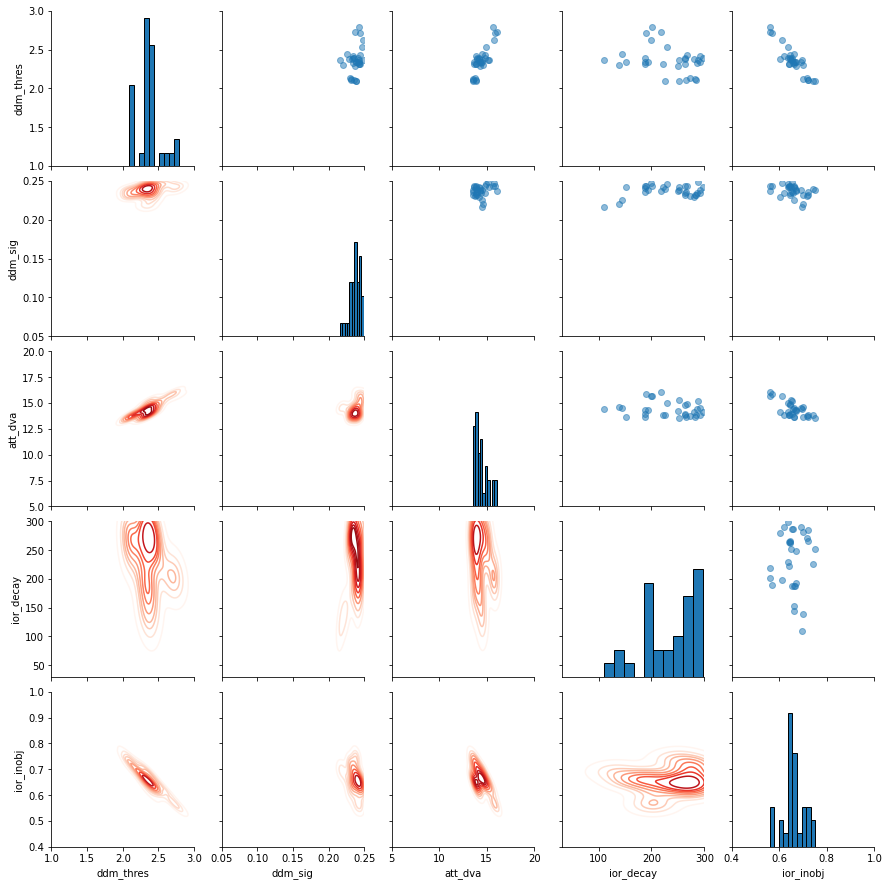

MainProcess root INFO     weightList not set, assuming single fitness value to be maximized.
MainProcess root INFO     Trajectory Name: results-2023-08-14-18H-23M-28S
MainProcess root INFO     Storing data to: ./data/hdf/evolution.hdf
MainProcess root INFO     Trajectory Name: results-2023-08-14-18H-23M-28S
MainProcess root INFO     Number of cores: 40
MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `./data/hdf/evolution.hdf`.
MainProcess pypet.environment.Environment INFO     Environment initialized.
MainProcess root INFO     Evolution: Using algorithm: adaptive
/home/users/n/nicolas-roth/miniconda3/envs/venv/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/users/n/nicolas-roth/miniconda3/envs/venv/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A 

________________________ 
runid = obj_train_None_64-32-50_2023-08-01-10H-43M-40S_22770884 
________________________
> Simulation parameters
HDF file storage: ./data/hdf/obj_train_None_64-32-50_2023-08-01-10H-43M-40S_22770884.hdf
Trajectory Name: results-2023-08-01-10H-43M-40S
Duration of evaluating initial population 0:42:03.179194
Duration of evolution 16:24:45.161071
Eval function: <function optimize_me at 0x7f5d58be9e60>
Parameter space: {'ddm_thres': [1.0, 3.0], 'ddm_sig': [0.05, 0.25], 'att_dva': [5, 20], 'ior_decay': [30, 300], 'ior_inobj': [0.4, 1.0]}
> Evolution parameters
Number of generations: 50
Initial population size: 64
Population size: 32
> Evolutionary operators
Mating operator: <function cxBlend at 0x7f5d731b14d0>
Mating paramter: {'alpha': 0.5}
Selection operator: <function selBest_multiObj at 0x7f5d6ee5fe60>
Selection paramter: {}
Parent selection operator: <function selRank at 0x7f5d6ee5fdd0>
Comments: no comments
--- Info summary ---
Valid: 32
Mean score (weighted 

/home/users/n/nicolas-roth/miniconda3/envs/venv/lib/python3.7/site-packages/neurolib/optimize/evolution/evolutionaryUtils.py:212: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


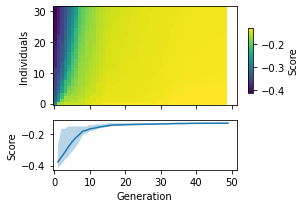

MainProcess root INFO     Saving plot to ./data/figures/results-2023-08-01-10H-43M-40S_hist_49.png


There are 32 valid individuals
Mean score across population: -0.13


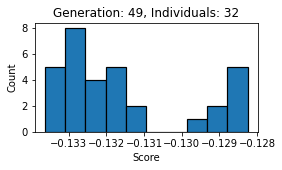

<Figure size 432x288 with 0 Axes>

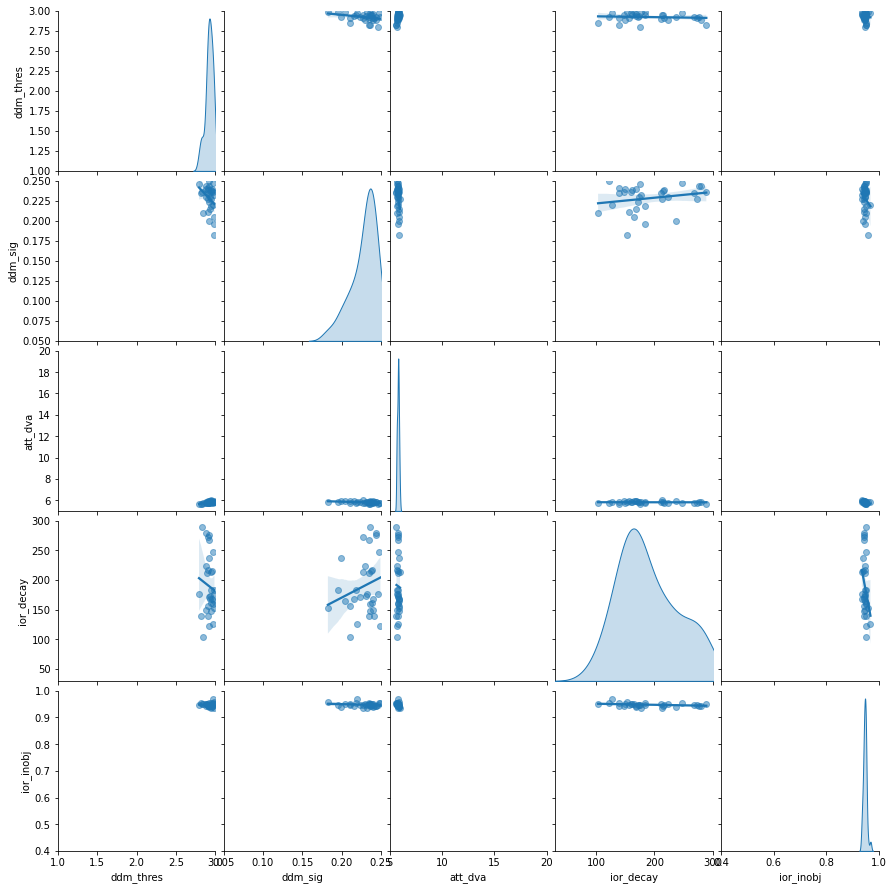

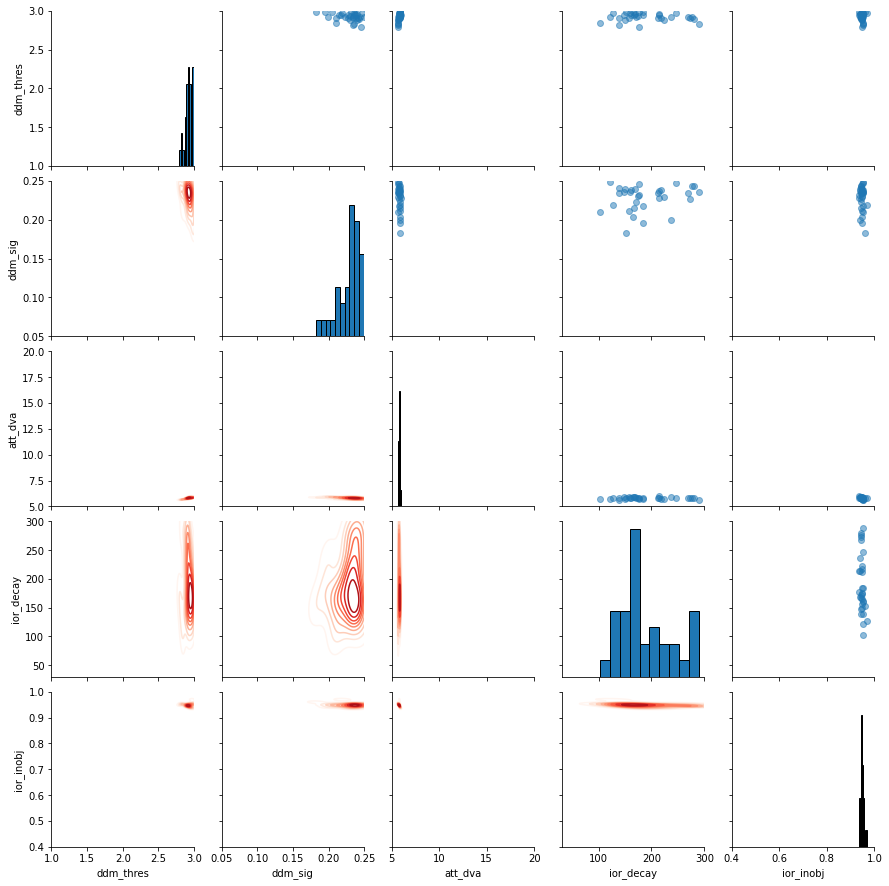

MainProcess root INFO     weightList not set, assuming single fitness value to be maximized.
MainProcess root INFO     Trajectory Name: results-2023-08-14-18H-23M-51S
MainProcess root INFO     Storing data to: ./data/hdf/evolution.hdf
MainProcess root INFO     Trajectory Name: results-2023-08-14-18H-23M-51S
MainProcess root INFO     Number of cores: 40
MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `./data/hdf/evolution.hdf`.
MainProcess pypet.environment.Environment INFO     Environment initialized.
MainProcess root INFO     Evolution: Using algorithm: adaptive
/home/users/n/nicolas-roth/miniconda3/envs/venv/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/users/n/nicolas-roth/miniconda3/envs/venv/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A 

________________________ 
runid = mix_train_molin_64-32-50_2023-08-01-10H-45M-24S_22770894 
________________________
> Simulation parameters
HDF file storage: ./data/hdf/mix_train_molin_64-32-50_2023-08-01-10H-45M-24S_22770894.hdf
Trajectory Name: results-2023-08-01-10H-45M-24S
Duration of evaluating initial population 0:57:44.278766
Duration of evolution 1 day, 0:25:08.698993
Eval function: <function optimize_me at 0x7f5d5db7e290>
Parameter space: {'ddm_thres': [1.0, 3.0], 'ddm_sig': [0.05, 0.25], 'att_dva': [5, 20], 'ior_decay': [30, 300], 'ior_dva': [0.5, 10]}
> Evolution parameters
Number of generations: 50
Initial population size: 64
Population size: 32
> Evolutionary operators
Mating operator: <function cxBlend at 0x7f5d731b14d0>
Mating paramter: {'alpha': 0.5}
Selection operator: <function selBest_multiObj at 0x7f5d6ee5fe60>
Selection paramter: {}
Parent selection operator: <function selRank at 0x7f5d6ee5fdd0>
Comments: no comments
--- Info summary ---
Valid: 32
Mean score (weig

/home/users/n/nicolas-roth/miniconda3/envs/venv/lib/python3.7/site-packages/neurolib/optimize/evolution/evolutionaryUtils.py:212: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


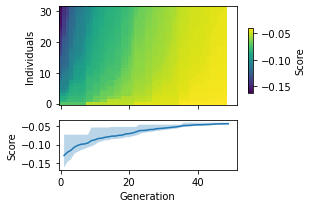

MainProcess root INFO     Saving plot to ./data/figures/results-2023-08-01-10H-45M-24S_hist_49.png


There are 32 valid individuals
Mean score across population: -0.043


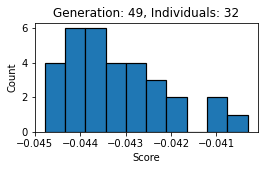

<Figure size 432x288 with 0 Axes>

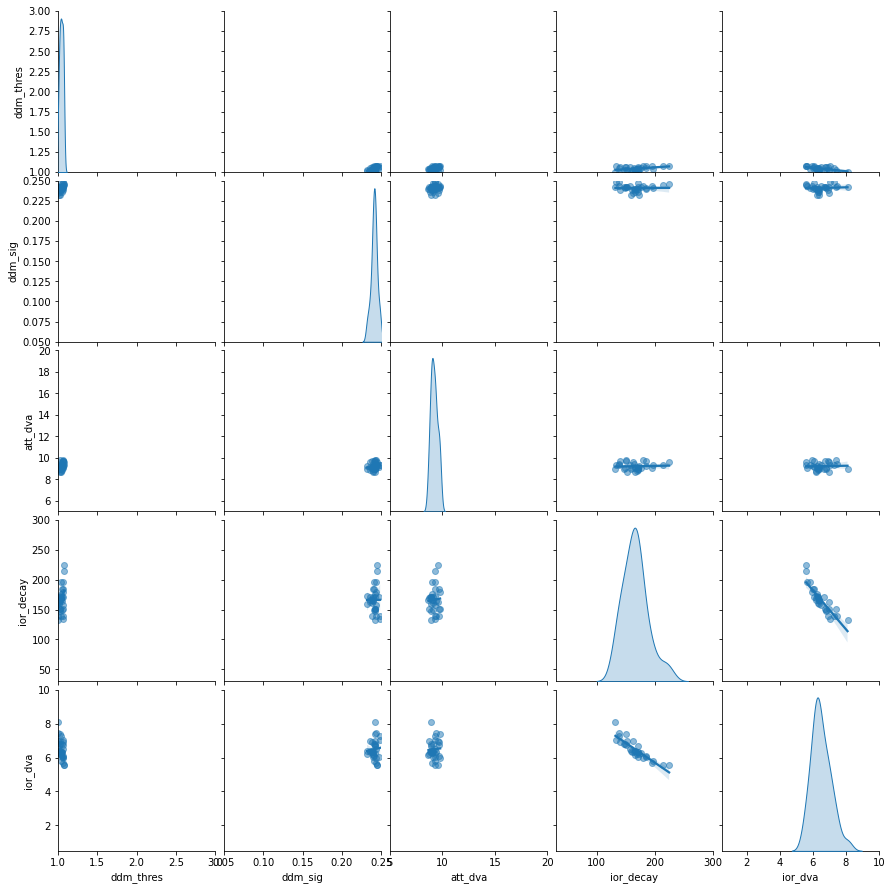

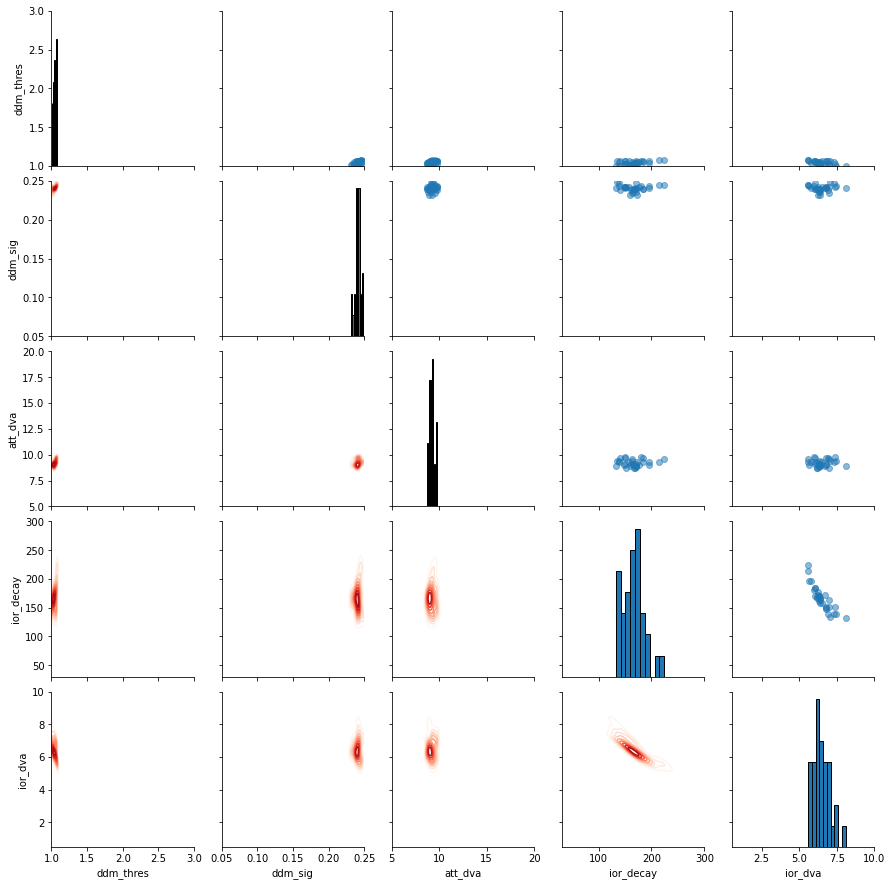

In [7]:
for runid in run_ids:
    DILLNAME = f'{runid}.dill'
    print(f'________________________ \nrunid = {runid} \n________________________')
    evol = Evolution(lambda x: x, ParameterSpace(['mock'], [[0, 1]]))
    evol = evol.loadEvolution(f'results/{runid}/{DILLNAME}')
    evol.info()


## S8 Fig: Control condition for Fig. 5
We run the same functional analysis but for the baseline condition where we change the object positions in the following way:

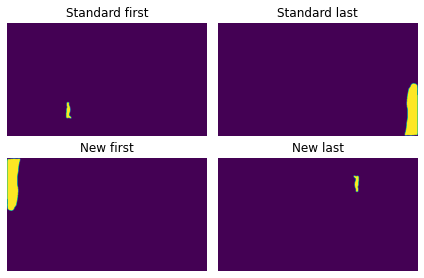

In [14]:
masks = VidCom.load_objectmasks("field03")
new_masks = [np.flipud(m) for m in masks]
new_masks = [np.fliplr(m) for m in new_masks]
new_masks = new_masks[::-1]

fig, axs = plt.subplots(2,2, figsize=(6,4))
axs[0,0].imshow(masks[0]); axs[0,0].set_title("Standard first")
axs[0,1].imshow(masks[-1]); axs[0,1].set_title("Standard last")
axs[1,0].imshow(new_masks[0]); axs[1,0].set_title("New first")
axs[1,1].imshow(new_masks[-1]); axs[1,1].set_title("New last")
for ax in axs.flatten():
    ax.axis('off')
plt.tight_layout(); plt.show()

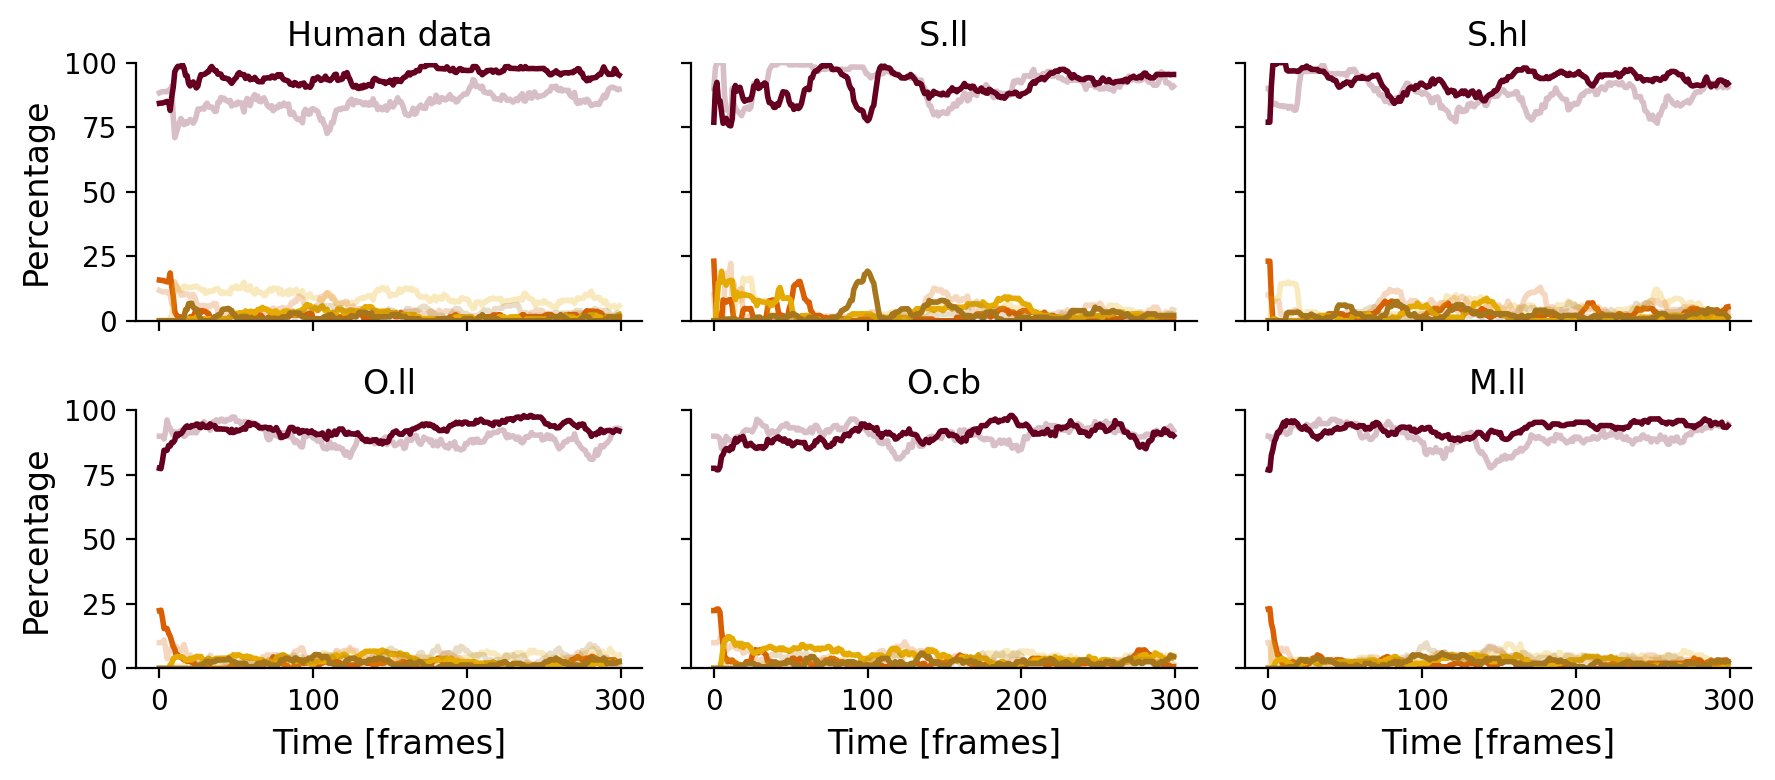

Trainset


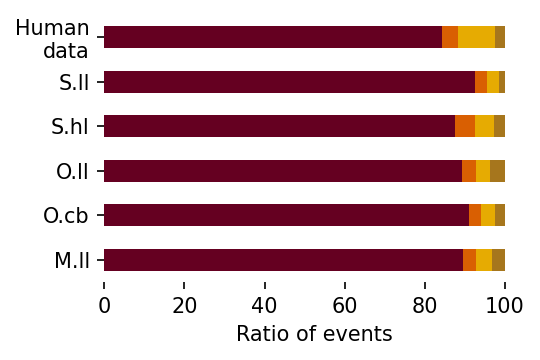

Testset


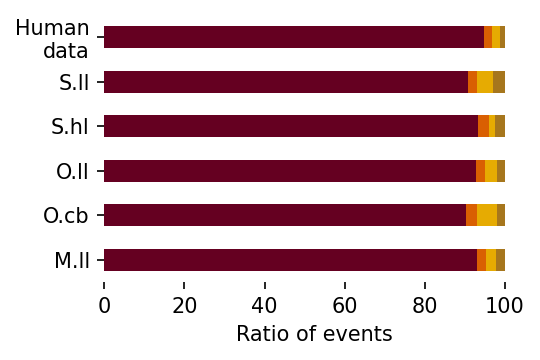

In [15]:
bl_fovcats_test = []
bl_fovcats_train = []

# Baseline akin to above
fig, axs = plt.subplots(2,3, dpi=200, figsize=(9,4), sharex=True, sharey=True)

for ax_i, ax in enumerate(axs.flatten()):
    if ax_i == 0:
        ax.set_ylabel('Percentage', fontsize=12)
        ax.set_title(gtname, fontsize=12)
        df = pd.read_csv('VidCom_example/gt_baseline_fov_df.csv', index_col=0)
        ratios_train = get_BDIR_per_frames(df[df.video.isin(VidCom.trainset)])
        ratios_test = get_BDIR_per_frames(df[df.video.isin(VidCom.testset)])
    else:
        model_idx = ax_i - 1
        runid = run_ids[model_idx]
        model = ObjectModel(VidCom)
        runid = run_ids[model_idx]
        with open(f'./results/{runid}/res_df_top0.pkl', 'rb') as file:
            restored_dict = pickle.load(file)
        model.result_dict = restored_dict
        df = model.evaluate_all_to_baseline_df()
        ratios_train = get_BDIR_per_frames(df[df.video.isin(VidCom.trainset)])
        ratios_test = get_BDIR_per_frames(df[df.video.isin(VidCom.testset)])
        ax.set_title(names[model_idx], fontsize=12)

    for i in range(4):
        ax.plot(ratios_train[i], color=dircl[i], lw=2, alpha=0.25)
        ax.plot(ratios_test[i], color=dircl[i], lw=2, label=dirnames[i])

    bl_fovcats_test.append(np.mean(ratios_test, axis=1))
    bl_fovcats_train.append(np.mean(ratios_train, axis=1))

    if ax_i == 3:
        ax.set_ylabel('Percentage', fontsize=12)
    if ax_i > 2:
        ax.set_xlabel('Time [frames]', fontsize=12)
    ax.set_ylim(0,100)
sns.despine(); plt.tight_layout(); plt.show()

# Plotting the average of the above in barplots
df_fovcats_train = pd.DataFrame(index=names[::-1] + ['Human\ndata'], data=bl_fovcats_train[::-1])
df_fovcats_test = pd.DataFrame(index=names[::-1] + ['Human\ndata'], data=bl_fovcats_test[::-1])
fig, ax = plt.subplots(figsize=(3.7,2.5),dpi=150)
df_fovcats_train.plot.barh(stacked=True, ax=ax,rot=0, legend=False, color=dircl)
ax.set_frame_on(False); ax.set(xlabel = 'Ratio of events')#, title = 'Trainset')
print("Trainset")
plt.tight_layout(); plt.show()
fig, ax = plt.subplots(figsize=(3.7,2.5),dpi=150)
df_fovcats_test.plot.barh(stacked=True, ax=ax,rot=0, legend=False, color=dircl)
ax.set_frame_on(False); ax.set(xlabel = 'Ratio of events')#, title = 'Testset')
print("Testset")
plt.tight_layout(); plt.show()


## S9 Fig: Qualitative comparison of high-coherence viewing behavior
First, we find periods of high inter-subject coherence by calculating the NSS score:

In [ ]:
for video in VidCom.trainset:
    df_vid = VidCom.gt_fovframes_nss_df[VidCom.gt_fovframes_nss_df.video == video]
    for subject in df_vid.subject.unique():
        df_subj = df_vid[df_vid.subject == subject]
        plt.plot(df_subj.frame, df_subj.nss, "-x", alpha=0.5) #, label=subject)
    plt.plot(df_vid.groupby('frame')["nss"].mean().reset_index()["nss"], lw=3, color="red")
    plt.title(video)
    plt.show()

We identify prominent peaks and plot the gaze position of all models in comparison with the human data:

In [13]:
def plot_qualitative_comp(video, frame):
    msize = 50
    image = VidCom.load_videoframes(video)[frame]
    gaze_df = VidCom.gt_fovframes_nss_df[(VidCom.gt_fovframes_nss_df.video == video) & (VidCom.gt_fovframes_nss_df.frame == frame)]
    fig, axs = plt.subplots(2,3, dpi=150, figsize=(10,4))
    axs[0,0].imshow(image, alpha=0.5)
    for sub in gaze_df.subject.unique():
        gaze = gaze_df[gaze_df.subject == sub][["x", "y"]].values[0]
        axs[0,0].scatter(gaze[0], gaze[1], marker="x", s=msize, c=mcl[0]) # , alpha=0.5
        df = VidCom.gt_foveation_df[(VidCom.gt_foveation_df.subject == sub) & (VidCom.gt_foveation_df.video == video)]
        df = df[df.frame_start > frame]
        if len(df) == 0:
            continue
        nextgaze = df.iloc[0][["x_start", "y_start"]].values
        axs[0,0].arrow(gaze[0], gaze[1], nextgaze[0]-gaze[0], nextgaze[1]-gaze[1], head_width=10, head_length=10, fc=mcl[0], ec=mcl[0], alpha=0.8)
    axs[0,0].set_title(gtname) # f"{video}, frame {frame}"
    axs[0,0].set_axis_off()
    
    # plot all gaze positions on image
    for model_idx in range(5):
        ax = axs.flatten()[model_idx+1]
        ax.imshow(image, alpha=0.5)
        ax.scatter(gaze_df.x, gaze_df.y, marker="x", s=msize, c=mcl[0]) # , alpha=0.5
        runid = run_ids[model_idx]
        name = names[model_idx]
        
        with open(f'./results/{runid}/res_df_top0.pkl', 'rb') as file:
            restored_dict = pickle.load(file)
        for key in restored_dict[video].keys():
            gaze = restored_dict[video][key]["gaze"][frame]
            ax.scatter(gaze[0], gaze[1], marker="x", s=msize, c=mcl[model_idx+1]) # , alpha=0.5
            df = restored_dict[video][key]["dfov"]
            # get x_start of the first row with frame > f
            df = df[df.frame_start > frame]
            # set max values of nextgaze to image size
            if len(df)==0:
                continue 
            nextgaze = df.iloc[0][["x_start", "y_start"]].values
            nextgaze[0] = max(5, min(nextgaze[0], image.shape[1]-5))
            nextgaze[1] = max(5, min(nextgaze[1], image.shape[0]-5))
            # draw arrow from gaze to next gaze
            ax.arrow(gaze[0], gaze[1], nextgaze[0]-gaze[0], nextgaze[1]-gaze[1], head_width=10, head_length=10, fc=mcl[model_idx+1], ec=mcl[model_idx+1], alpha=0.4)
            
        ax.set_title(f"{name}")
        ax.set_axis_off()
    print(f"{video}, frame {frame}")
    # fig.suptitle(f"{video}, frame {frame}", fontsize=14)
    plt.tight_layout(); plt.show()

park09, frame 60


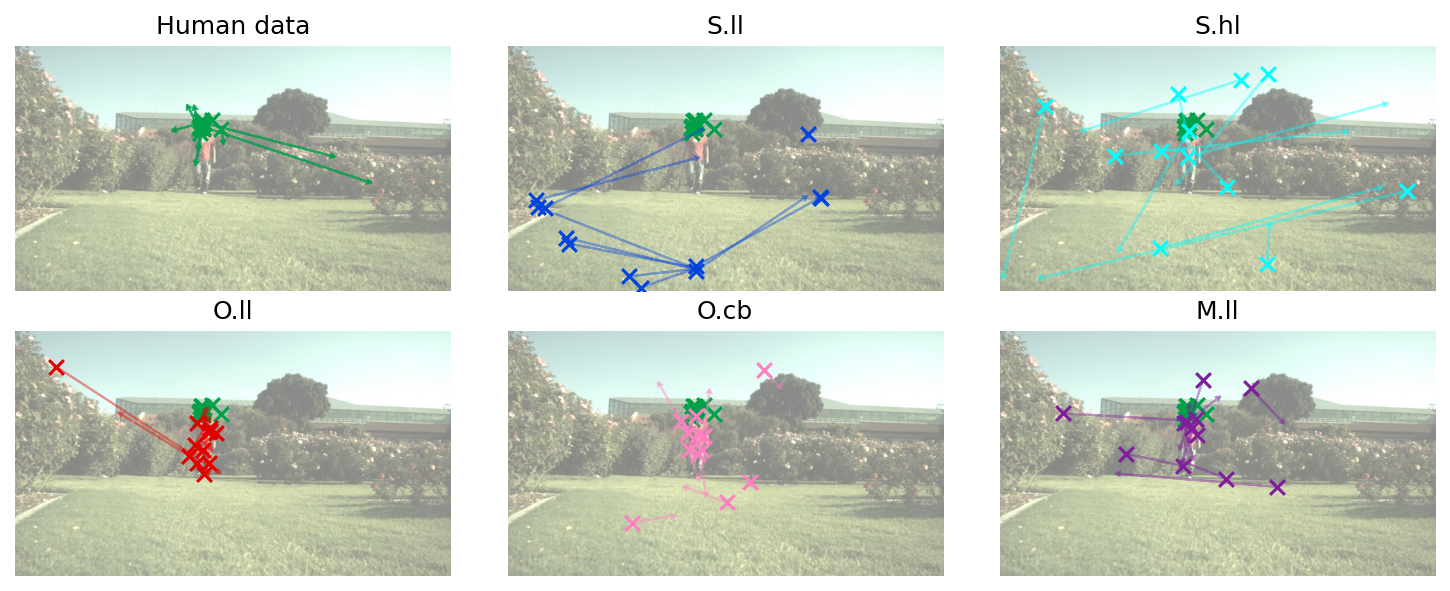

garden04, frame 177


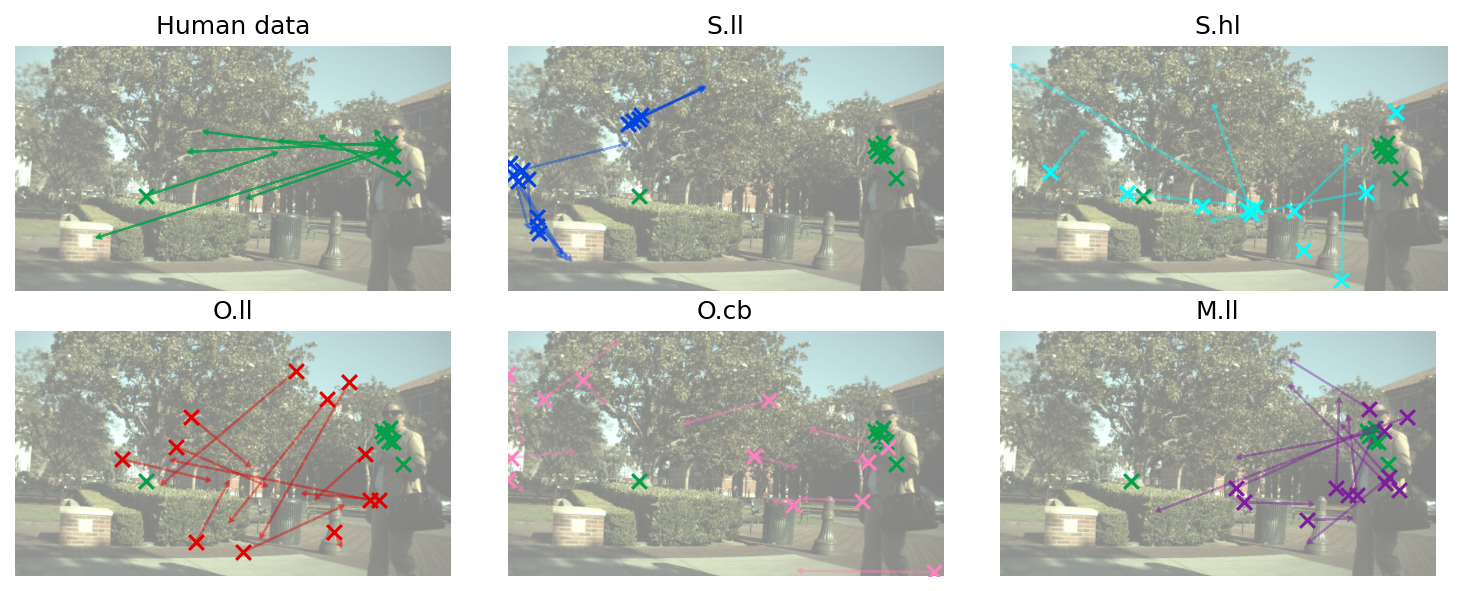

walkway01, frame 262


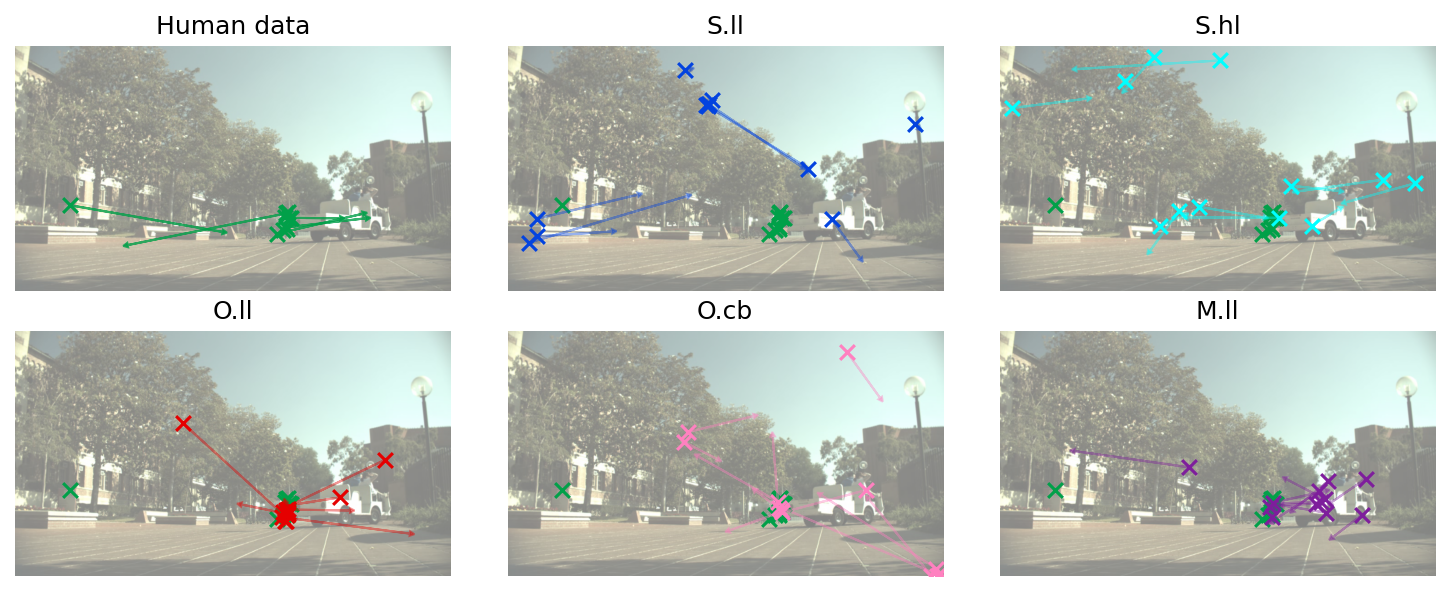

In [14]:
plot_qualitative_comp('park09', 60)
plot_qualitative_comp('garden04', 177) # 180?
plot_qualitative_comp('walkway01', 262)
# plot_qualitative_comp('field03', 208)
# plot_qualitative_comp('garden09', 25)
# plot_qualitative_comp('road04', 248)
# plot_qualitative_comp('robarm01', 25)
# plot_qualitative_comp('room02', 75)
# plot_qualitative_comp('tommy02', 165)
# plot_qualitative_comp('uscdog01', 100)
# plot_qualitative_comp('walkway02', 180)

## S10 Fig: Animation of individual modules of the S.ll model
We use the parameter set with the highest fitness to visualize the individual modules of the S.ll model. 

In [12]:
runid = run_ids[0]
print(f'________________________ \nrunid = {runid} \n________________________')
evol = Evolution(lambda x: x, ParameterSpace(['mock'], [[0, 1]]))
evol = evol.loadEvolution(f'results/{runid}/{runid}.dill')
df_evol = evol.dfEvolution(outputs=True).copy()
model = LocationModel(VidCom)
model.params["featuretype"] = "molin"
parameters = ["ddm_thres", "ddm_sig", "att_dva", "ior_decay", "ior_dva"]
for par in parameters:
    model.params[par] = df_evol.sort_values("score", ascending=False).iloc[0][par]
model.run('field03', seeds = [10])
model.evaluate_all_to_df()
model.result_df

MainProcess root INFO     weightList not set, assuming single fitness value to be maximized.
MainProcess root INFO     Trajectory Name: results-2023-08-15-14H-38M-22S
MainProcess root INFO     Storing data to: ./data/hdf/evolution.hdf
MainProcess root INFO     Trajectory Name: results-2023-08-15-14H-38M-22S
MainProcess root INFO     Number of cores: 40
MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `./data/hdf/evolution.hdf`.
MainProcess pypet.environment.Environment INFO     Environment initialized.
MainProcess root INFO     Evolution: Using algorithm: adaptive
/home/users/n/nicolas-roth/miniconda3/envs/venv/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/users/n/nicolas-roth/miniconda3/envs/venv/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A 

________________________ 
runid = loc_train_molin_64-32-50_2023-08-01-10H-46M-11S_22770898 
________________________


MainProcess root INFO     Run video 1/1: field03 from videos_to_run field03...


nfov    video  subject  frame_start  frame_end  duration_ms  x_start  \
0      0  field03  seed010            0          0    30.107206      480   
1      1  field03  seed010            2          4    87.731587      387   
2      2  field03  seed010            6          7    60.289602      288   
3      3  field03  seed010            8         17   281.222177      280   
4      4  field03  seed010           18         24   196.123513      191   
5      5  field03  seed010           25         41   520.286875      193   
6      6  field03  seed010           43         50   246.313173      456   
7      7  field03  seed010           52         55    91.565418      676   
8      8  field03  seed010           56         64   280.136501      676   
9      9  field03  seed010           66         73   229.388036      575   
10    10  field03  seed010           74        103   984.288821      541   
11    11  field03  seed010          105        117   389.570787      798   
12    12  field03  seed010          118        131   445.538639      899   
13    13  field03  seed010          133        144   375.896911      782   
14    14  field03  seed010          145        163   590.798529      786   
15    15  field03  seed010          165        170   149.056762      460   
16    16  field03  seed010          171        179   270.647553      388   
17    17  field03  seed010          180        191   356.530345      266   
18    18  field03  seed010          192        207   499.863813      159   
19    19  field03  seed010          209        226   580.576928       95   
20    20  field03  seed010          227        258  1034.979479      102   
21    21  field03  seed010          259        275   523.866823      166   
22    22  field03  seed010          277        283   181.808937      376   
23    23  field03  seed010          284        298   462.959912      388   

    y_start  x_end  y_end  sac_amp_dva    sac_dur    object  sac_angle_h  \
0       270    480    270          NaN   0.000000    Ground          NaN   
1       260    386    266     5.612165  38.152846    Ground  -173.862744   
2       402    291    399    10.057833  50.156148  Object 1   125.776078   
3       400    292    392     0.662722  24.789348  Object 1   174.805571   
4       193    189    184    13.389817  59.152506    Ground  -116.909511   
5       189    194    201     0.384187  24.037306    Ground    51.340192   
6       105    459    106    16.742043  68.203516    Ground   -20.123451   
7       324    678    329    18.455536  72.829947    Ground    45.131714   
8       322    672    331     0.436807  24.179378    Ground  -105.945396   
9       476    570    470    10.467206  51.261456    Ground   123.781158   
10      508    545    519     2.868100  30.743871    Ground   127.349349   
11      436    809    429    15.976007  66.135219    Ground   -18.162762   
12      325    893    313     8.252127  45.280743    Ground   -49.127592   
13      169    772    169    10.908950  52.454166    Ground  -127.626234   
14      154    784    145     1.231097  26.323962    Ground   -46.974934   
15      145    465    140    19.440000  75.488000    Ground   180.000000   
16      259    386    266     8.504352  45.961750    Ground   122.905243   
17      264    260    264     7.201000  42.442700    Ground  -179.045159   
18      316    251    320     6.816011  41.403229  Object 2   152.758258   
19      408     95    405    10.746534  52.015643    Ground   150.572544   
20      470     99    466     3.922550  33.590886    Ground    83.853374   
21      516    170    516     5.016014  36.543239    Ground    36.732827   
22      304    367    309    17.736065  70.887375    Ground   -45.822371   
23      255    399    257     3.476377  32.386219    Ground   -68.749494   

    sac_angle_p      fov_end    fov_start fov_category  ret_times  
0           NaN    30.107206     0.000000            B        NaN  
1           NaN   155.991639    68.260052            B        NaN 

In [13]:
model.write_sgl_output_gif('field03_Sll_top_sglrun', slowgif=True, dpi=75)

Saved to /beegfs/home/users/n/nicolas-roth/ScanDy/visualizations/field03_Sll_top_sglrun_slow.gif


## S11 Fig: Animation of twelve simulated scanpaths

In [8]:
model.run('field03', seeds = [s for s in range(1, 13)], overwrite_old=True)
model.evaluate_all_to_df(overwrite_old=True)
model.video_output_gif('field03', 'field03_Sll_top', slowgif=False, dpi=50)

MainProcess root INFO     Run video 1/1: field03 from videos_to_run field03...


Saved to /beegfs/home/users/n/nicolas-roth/ScanDy/visualizations/field03_Sll_top.gif


## S12 Fig: Animation of individual modules of the O.ll model 

In [9]:
runid = run_ids[2]
print(f'________________________ \nrunid = {runid} \n________________________')
evol = Evolution(lambda x: x, ParameterSpace(['mock'], [[0, 1]]))
evol = evol.loadEvolution(f'results/{runid}/{runid}.dill')
df_evol = evol.dfEvolution(outputs=True).copy()
model = ObjectModel(VidCom)
model.params["featuretype"] = "molin"
parameters = ["ddm_thres", "ddm_sig", "att_dva", "ior_decay", "ior_inobj"]
for par in parameters:
    model.params[par] = df_evol.sort_values("score", ascending=False).iloc[0][par]
model.run('field03', seeds = [10])
model.evaluate_all_to_df()
model.result_df

MainProcess root INFO     weightList not set, assuming single fitness value to be maximized.
MainProcess root INFO     Trajectory Name: results-2023-08-15-14H-27M-28S
MainProcess root INFO     Storing data to: ./data/hdf/evolution.hdf
MainProcess root INFO     Trajectory Name: results-2023-08-15-14H-27M-28S
MainProcess root INFO     Number of cores: 40
MainProcess pypet.storageservice.HDF5StorageService INFO     I will use the hdf5 file `./data/hdf/evolution.hdf`.
MainProcess pypet.environment.Environment INFO     Environment initialized.
MainProcess root INFO     Evolution: Using algorithm: adaptive
/home/users/n/nicolas-roth/miniconda3/envs/venv/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/users/n/nicolas-roth/miniconda3/envs/venv/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A 

________________________ 
runid = obj_train_molin_64-32-50_2023-08-01-10H-44M-52S_22770892 
________________________


MainProcess root INFO     Run video 1/1: field03 from videos_to_run field03...


nfov    video  subject  frame_start  frame_end  duration_ms  x_start  \
0      0  field03  seed010            0          3   120.954860      480   
1      1  field03  seed010            5          9   144.906724      284   
2      2  field03  seed010           10         24   445.652956      278   
3      3  field03  seed010           25         34   308.854276      222   
4      4  field03  seed010           35         44   295.376861      208   
5      5  field03  seed010           46         56   338.494314      368   
6      6  field03  seed010           58         73   526.211204      196   
7      7  field03  seed010           74         87   409.402111      204   
8      8  field03  seed010           89        102   456.464092      426   
9      9  field03  seed010          104        114   328.930240      417   
10    10  field03  seed010          115        126   372.864652      561   
11    11  field03  seed010          128        144   540.229499      646   
12    12  field03  seed010          147        155   295.591427      362   
13    13  field03  seed010          157        168   370.311764      592   
14    14  field03  seed010          169        177   244.964760      625   
15    15  field03  seed010          180        187   248.905296      156   
16    16  field03  seed010          188        200   395.227525      100   
17    17  field03  seed010          201        235  1119.515804      130   
18    18  field03  seed010          236        244   258.425380      392   
19    19  field03  seed010          245        254   293.204933      529   
20    20  field03  seed010          255        272   575.150876      591   
21    21  field03  seed010          274        285   367.294584      597   
22    22  field03  seed010          286        299   450.123095      470   

    y_start  x_end  y_end  sac_amp_dva     sac_dur    object  sac_angle_h  \
0       270    479    273          NaN    0.000000    Ground          NaN   
1       446    281    446    15.640793   65.230141  Object 1   138.421219   
2       435    269    432     0.684105   24.847084  Object 1  -105.255119   
3       365    214    371     4.910479   36.258292    Ground  -125.049373   
4       196    209    192    10.506170   51.366658    Ground   -91.963658   
5       209    378    216     9.594373   48.904808    Ground     6.102780   
6       198    198    202    10.973277   52.627847    Ground  -174.351753   
7       267    191    284     3.916580   33.574766    Ground    84.726104   
8       398    428    405    15.671490   65.313023    Ground    25.878320   
9       249    421    245     9.383240   48.334749    Ground   -94.033411   
10      295    551    299     8.919641   47.083031    Ground    19.653824   
11      464    641    452    11.423660   53.843881    Ground    60.068488   
12      190    356    184    22.964015   85.002841    Ground  -136.799830   
13      314    584    316    16.166187   66.648705    Ground    28.848059   
14      299    633    306     2.663081   30.190318    Ground   -22.520566   
15      356    157    355    28.776803  100.697369    Ground   174.016006   
16      333    196    332     3.665897   32.897922  Object 2  -158.895161   
17      416    410    435     6.409618   40.305968  Object 3   128.157227   
18      363    460    377     4.452954   35.022976  Object 3  -104.036243   
19      432    624    434     5.294299   37.294607  Object 3    38.558400   
20      297    654    304     8.455105   45.828783  Object 3  -103.543177   
21      455    589    456     9.684007   49.146820    Ground   110.680691   
22      437    483    441     7.230436   42.522176    Ground  -170.928502   

    sac_angle_p       fov_end    fov_start fov_category  ret_times  
0           NaN    120.954860     0.000000            B        NaN  
1           NaN    331.091725   186.185001            D        NaN  
2    116.323662    801.591766   355.938809            I        NaN  
3    -19.794255   1146.704334   837.850058            

In [10]:
model.write_sgl_output_gif('field03_Oll_top_sglrun', slowgif=True, dpi=90)

/home/users/n/nicolas-roth/miniconda3/envs/venv/lib/python3.7/site-packages/matplotlib/image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/home/users/n/nicolas-roth/miniconda3/envs/venv/lib/python3.7/site-packages/matplotlib/image.py:477: UserWarning: Warning: converting a masked element to nan.
  vrange = np.array([vmin, vmax], dtype=scaled_dtype)


Saved to /beegfs/home/users/n/nicolas-roth/ScanDy/visualizations/field03_Oll_top_sglrun_slow.gif


In [11]:
model.run('field03', seeds = [s for s in range(1, 13)], overwrite_old=True)
model.evaluate_all_to_df(overwrite_old=True)
model.video_output_gif('field03', 'field03_Oll_top', slowgif=False, dpi=50)

MainProcess root INFO     Run video 1/1: field03 from videos_to_run field03...


Saved to /beegfs/home/users/n/nicolas-roth/ScanDy/visualizations/field03_Oll_top.gif


## Additional information as answers to questions from reviewers
### IOR and salience

In [9]:
def get_sal(row, salmap):
    return salmap[row["frame_start"], min(row["y_start"],539) , min(row["x_start"], 959)]

df_sal  = VidCom.gt_foveation_df.copy()
df_sal["amp_diff"] = df_sal['sac_amp_dva'] - df_sal['sac_amp_dva'].shift(1)

for video in sorted(df_sal.video.unique()):
    sal_map = VidCom.load_featuremaps(video, "molin")
    df_sal.loc[df_sal.video == video, "sal"] = df_sal.apply(get_sal, salmap=sal_map, axis=1)
    df_vid = df_sal.loc[df_sal.video == video]
    df_vid_ret = df_vid[(df_vid.sac_angle_p.abs() > 177.5) & (df_vid.amp_diff.abs() < 1.5)]
    print(f"Mean sal for {video}: {sal_map.mean()}, of targets: {df_vid['sal'].mean()}, of ret_targets: {df_vid_ret['sal'].mean()} (n={len(df_vid_ret)}))")

print("_____________")
df_ret = df_sal[(df_sal.sac_angle_p.abs() > 178) & (df_sal.amp_diff.abs() < 1.5)]
N_angp = len(df_sal[df_sal["sac_angle_p"].isna()==False])
print(f"Overall saliency of: targets: {np.round(df_sal['sal'].mean(),3)} +- {np.round(df_sal['sal'].std(),3)}, of ret_targets: {np.round(df_ret['sal'].mean(),3)} +- {np.round(df_ret['sal'].std(),3)} (n={len(df_ret)}, {np.round(100 * len(df_ret) / N_angp,2)}%)")

df_sal

Mean sal for dance01: 0.07062147625102332, of targets: 0.12059669610289868, of ret_targets: 0.07694198108185003 (n=4))
Mean sal for dance02: 0.06739079359600172, of targets: 0.12838276932529347, of ret_targets: 0.09182873961184304 (n=1))
Mean sal for field03: 0.07957082405193783, of targets: 0.147328802975378, of ret_targets: nan (n=0))
Mean sal for foutain02: 0.05205236832652547, of targets: 0.15149596908107077, of ret_targets: 0.19650687394890104 (n=4))
Mean sal for garden04: 0.07686698475795986, of targets: 0.1282505008904524, of ret_targets: nan (n=0))
Mean sal for garden06: 0.05822253264848301, of targets: 0.11670856627776173, of ret_targets: 0.15595289851262178 (n=5))
Mean sal for garden07: 0.07139960087597004, of targets: 0.15467288978438848, of ret_targets: 0.07132934465241318 (n=3))
Mean sal for garden09: 0.06842828883216134, of targets: 0.11581553218855628, of ret_targets: 0.15392751399782217 (n=3))
Mean sal for park01: 0.0511894402980123, of targets: 0.1102146607596575, of r

duration_ms  x_start  x_end  y_start  y_end  frame_start  frame_end  \
0         237.500      481    479      274    276            0          7   
1         437.500      609    559      273    316            9         22   
2        1470.833      539    314      262    209           25         69   
3         179.167      394    391      345    333           72         77   
4         491.667      388    402      322    330           78         92   
...           ...      ...    ...      ...    ...          ...        ...   
4787     1179.166      595    573      322    290          147        182   
4788      683.333      479    506      317    311          185        205   
4789      583.333      276    480      229    172          208        226   
4790      662.500      489    496      311    309          239        259   
4791     1266.666      558    558      402    402          261        299   

     subject      video    object  sac_amp_dva  sac_angle_h  sac_angle_p  \
0         DL    dance01    Ground          NaN          NaN          NaN   
1         DL    dance01  Object 1     7.802077    -1.321976          NaN   
2         DL    dance01  Object 1     3.455083  -110.323137  -109.001161   
3         DL    dance01  Object 2     9.467080    59.534455   169.857592   
4         DL    dance01  Object 2     0.684105  -105.255119  -164.789574   
...      ...        ...       ...          ...          ...          ...   
4787      ZQ  walkway03    Ground    13.382018   122.550003   178.573459   
4788      ZQ  walkway03    Ground     5.868049   163.974133    41.424129   
4789      ZQ  walkway03  Object 2    14.650816  -160.377744    35.648124   
4790      ZQ  walkway03    Ground     8.357464    86.295373  -113.326884   
4791      ZQ  walkway03    Ground     6.706325    56.309932   -29.985440   

     fov_category  ret_times  nfov  amp_diff       sal  
0               B        NaN     0       NaN  0.070573  
1               D        NaN     1       NaN  0.318108  
2               I        NaN     2 -4.346993  0.325435  
3               D        NaN     3  6.011997  0.072648  
4               I        NaN     4 -8.782975  0.119875  
...           ...        ...   ...       ...       ...  
4787            B        NaN    10  3.397289  0.101980  
4788            B        NaN    11 -7.513969  0.083822  
4789            D        NaN    12  8.782767  0.159373  
4790            B        NaN    13 -6.293352  0.084506  
4791            B        NaN    14 -1.651138  0.173128  

[4792 rows x 18 columns]

In [10]:
for runid in run_ids:
    df_sal = pd.read_csv(f'./results/{runid}/res_df_top0.csv.gz', compression='gzip')
    df_sal["amp_diff"] = df_sal['sac_amp_dva'] - df_sal['sac_amp_dva'].shift(1)
    for video in sorted(df_sal.video.unique()):
        sal_map = VidCom.load_featuremaps(video, "molin")
        df_sal.loc[df_sal.video == video, "sal"] = df_sal.apply(get_sal, salmap=sal_map, axis=1)

    print("_____________")
    print(runid)
    df_ret = df_sal[(df_sal.sac_angle_p.abs() > 178) & (df_sal.amp_diff.abs() < 1.5)]
    N_angp = len(df_sal[df_sal["sac_angle_p"].isna()==False])
    print(f"Overall saliency of: targets: {np.round(df_sal['sal'].mean(),3)} ± {np.round(df_sal['sal'].std(),3)}, of ret_targets: {np.round(df_ret['sal'].mean(),3)} ± {np.round(df_ret['sal'].std(),3)} (n={len(df_ret)}, {np.round(100 * len(df_ret) / N_angp,2)}%)")


_____________
loc_train_molin_64-32-50_2023-08-01-10H-46M-11S_22770898
Overall saliency of: targets: 0.233 ± 0.104, of ret_targets: 0.407 ± 0.132 (n=5, 0.08%)
_____________
loc_train_TASEDnet_64-32-50_2023-08-01-10H-46M-30S_22770899
Overall saliency of: targets: 0.109 ± 0.088, of ret_targets: 0.149 ± 0.119 (n=8, 0.13%)
_____________
obj_train_molin_64-32-50_2023-08-01-10H-44M-52S_22770892
Overall saliency of: targets: 0.175 ± 0.104, of ret_targets: 0.246 ± 0.1 (n=51, 0.75%)
_____________
obj_train_None_64-32-50_2023-08-01-10H-43M-40S_22770884
Overall saliency of: targets: 0.104 ± 0.086, of ret_targets: 0.153 ± 0.111 (n=17, 0.26%)
_____________
mix_train_molin_64-32-50_2023-08-01-10H-45M-24S_22770894
Overall saliency of: targets: 0.165 ± 0.101, of ret_targets: 0.209 ± 0.086 (n=44, 0.73%)


### Which object was detected first in each video in the majority of trials?

In [25]:
print(VidCom.gt_foveation_df.object.unique())

df_only_obj = VidCom.gt_foveation_df[VidCom.gt_foveation_df['object'].str.startswith("Obj")]
first_occurrences = df_only_obj.groupby(['video', 'subject'])['object'].first().reset_index()
print(first_occurrences.groupby('video')['object'].value_counts().unstack().fillna(0))

winner_df = pd.DataFrame()
df = first_occurrences.groupby('video')['object'].value_counts().unstack().fillna(0).reset_index()
object_columns = [col for col in df.columns if col.startswith("Obj")]
df['winner'] = df[object_columns].idxmax(axis=1)
winner_df["video"] = df['video']
winner_df["GT"] = df['winner']

for r_i, runid in enumerate(run_ids):
    df = pd.read_csv(f'./results/{runid}/res_df_top0.csv.gz', compression='gzip')
    df_only_obj = df[df['object'].str.startswith("Obj")]
    first_occurrences = df_only_obj.groupby(['video', 'subject'])['object'].first().reset_index()
    df = first_occurrences.groupby('video')['object'].value_counts().unstack().fillna(0).reset_index()
    object_columns = [col for col in df.columns if col.startswith("Obj")]
    df['winner'] = df[object_columns].idxmax(axis=1)
    winner_df[names[r_i]] = df['winner'].values
    # print(f"_____________\n{runid}")
    # print(df)

winner_df

['Ground' 'Object 1' 'Object 2' 'Object 3' 'Object 5' 'Object 4']
object     Object 1  Object 2  Object 3  Object 4
video                                            
dance01        12.0       0.0       0.0       0.0
dance02        14.0       0.0       0.0       0.0
field03         9.0       2.0       1.0       0.0
foutain02       1.0      11.0       1.0       0.0
garden04        1.0      10.0       1.0       0.0
garden06       13.0       1.0       0.0       0.0
garden07        6.0       7.0       0.0       0.0
garden09       12.0       0.0       0.0       0.0
park01          0.0       8.0       4.0       0.0
park06          9.0       3.0       0.0       0.0
park09         11.0       0.0       0.0       0.0
road02         11.0       0.0       0.0       0.0
road04          7.0       4.0       0.0       0.0
road05          7.0       3.0       1.0       0.0
robarm01        0.0      12.0       0.0       0.0
room01         10.0       0.0       0.0       0.0
room02         12.0       0.0     

video        GT      S.ll      S.hl      O.ll      O.cb      M.ll
0     dance01  Object 1  Object 1  Object 2  Object 1  Object 1  Object 1
1     dance02  Object 1  Object 1  Object 1  Object 1  Object 1  Object 1
2     field03  Object 1  Object 1  Object 3  Object 1  Object 2  Object 1
3   foutain02  Object 2  Object 3  Object 2  Object 1  Object 2  Object 1
4    garden04  Object 2  Object 1  Object 2  Object 2  Object 2  Object 2
5    garden06  Object 1  Object 2  Object 2  Object 1  Object 1  Object 1
6    garden07  Object 2  Object 1  Object 2  Object 2  Object 2  Object 2
7    garden09  Object 1  Object 1  Object 1  Object 1  Object 1  Object 1
8      park01  Object 2  Object 2  Object 2  Object 3  Object 3  Object 3
9      park06  Object 1  Object 1  Object 1  Object 1  Object 2  Object 1
10     park09  Object 1  Object 1  Object 1  Object 1  Object 1  Object 1
11     road02  Object 1  Object 1  Object 1  Object 1  Object 1  Object 1
12     road04  Object 1  Object 2  Object 1  Object 1  Object 1  Object 1
13     road05  Object 1  Object 1  Object 2  Object 2  Object 3  Object 2
14   robarm01  Object 2  Object 2  Object 1  Object 2  Object 1  Object 2
15     room01  Object 1  Object 1  Object 1  Object 1  Object 1  Object 1
16     room02  Object 1  Object 1  Object 1  Object 1  Object 1  Object 1
17     room03  Object 1  Object 1  Object 1  Object 1  Object 1  Object 1
18    tommy02  Object 2  Object 1  Object 2  Object 2  Object 2  Object 2
19   uscdog01  Object 1  Object 1  Object 1  Object 1  Object 1  Object 1
20  walkway01  Object 1  Object 1  Object 1  Object 4  Object 2  Object 4
21  walkway02  Object 2  Object 2  Object 2  Object 2  Object 2  Object 2
22  walkway03  Object 1  Object 2  Object 1  Object 1  Object 1  Object 1

In [26]:
winner_df.loc[winner_df["GT"] != winner_df["O.ll"]]

video        GT      S.ll      S.hl      O.ll      O.cb      M.ll
3   foutain02  Object 2  Object 3  Object 2  Object 1  Object 2  Object 1
8      park01  Object 2  Object 2  Object 2  Object 3  Object 3  Object 3
13     road05  Object 1  Object 1  Object 2  Object 2  Object 3  Object 2
20  walkway01  Object 1  Object 1  Object 1  Object 4  Object 2  Object 4

In [27]:
for model in names:
    correct_ratio = np.sum(winner_df[model]==winner_df['GT']) / len(winner_df) 
    cr_train = np.sum(winner_df[model][winner_df['video'].isin(VidCom.trainset)]==winner_df['GT'][winner_df['video'].isin(VidCom.trainset)]) / len(winner_df[winner_df['video'].isin(VidCom.trainset)])
    cr_test = np.sum(winner_df[model][winner_df['video'].isin(VidCom.testset)]==winner_df['GT'][winner_df['video'].isin(VidCom.testset)]) / len(winner_df[winner_df['video'].isin(VidCom.testset)])
    print(model, np.round(correct_ratio*100,1), ", train: ", cr_train, ", test: ", np.round(cr_test*100,1))

S.ll 69.6 , train:  0.7 , test:  69.2
S.hl 78.3 , train:  0.7 , test:  84.6
O.ll 82.6 , train:  0.8 , test:  84.6
O.cb 73.9 , train:  0.7 , test:  76.9
M.ll 82.6 , train:  0.8 , test:  84.6


Whenever O.ll made errors, some humans actually looked at this object first!